#### 1.  Packages

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

import sys

pd.options.mode.chained_assignment = None  # default='warn'

In [73]:
#common training code
#to import common file
sys.path.insert(1, 'common')
import fileprocessing_common as fp
import molchem_common as molchem
import dataanalysis_common as da
import score_common as score
import modelquantification_common as quantify

# when any outside python is updated, run the following to reload the new version
%load_ext autoreload
%autoreload 

CI = quantify.CI = 0.95
z_value = quantify.z_value = scipy.stats.norm.ppf((1 + CI) / 2.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### 2.  Variables

In [40]:
RANDOMSTATE = 42
TAACF = 'TAACF'
MLSMR = 'MLSMR'
dataset = 'KasA'

inhibitionThreshold = 90
data_path = 'ignore/data/'
image_path = "ignore\\images\\"
model_path = 'ignore/model/'

data_path_scoring = f'{data_path}{dataset}/'
image_path_scoring = f"{image_path}{dataset}\\"

suffix_MLSMR = '_M'
suffix_TAACF = '_TS'
suffix = f'_{dataset}'

filename_dataset = 'DockedTop1000'
filename_salts = 'common/salts_default.txt'
filename_descriptors = f'{dataset}_2Descriptors.csv'
filename_data_train = f'x_train'
filename_data_scaled = f'scaled'

col_molid = 'MoleculeId'
col_smiles = 'SMILES'
col_cluster = 'Cluster'

col_RDKitMol = 'RDKitMol'
col_smilesStripped = 'smilesStripped'
col_strippedSalts = 'strippedSalts'
col_NonDescriptors = ["MoleculeId", "SMILES", "RDKitMol", "molStripped", "strippedSalts", "Cluster"]


'''
filename_deduped = f'{dataset}_Deduped.csv'
filename_descriptors_vtcorr = f'featuresVTCorr{suffix}.csv'
filename_descriptors_scaled = f'featuresScaled'
filename_descriptors_unscaled = f'Descriptors'
filename_scaler = f'scaler_std'
filename_traintest_base = ''
filename_model_metrics = 'model_metrics'
filename_model_featureimportance = 'model_featureimportance'
filename_model_hyperparameter = 'model_hyperparameter'
# filename_splitsminstd = f'{DATA_PATH}SplitsMinSTD{SUFFIX}'
filename_splitsminstd = f'SplitsMinSTD'
filename_img_metrics_baseline = 'baseline_metrics'
filename_img_metrics = 'model_metrics'
filename_img_metrics_topmodels = 'model_metrics_topmodels'
filename_img_auc_baseline = f'baseline_auc'
filename_img_auc = f'_auc'
filename_img_auc_topmodels = f'_auc_topmodels'
filename_img_pr_baseline = f'baseline_precisionrecall'
filename_img_pr = f'precisionrecall'
filename_img_pr_topmodels = f'precisionrecall_topmodels'
filename_img_featureimportance_top = 'model_featureimportance_top'
filename_img_hyperparameter_top = 'model_hyperparameter_top'

col_molname = 'MoleculeName'
col_smiles = 'SMILES'
col_inhibition = 'MtbH37Rv-Inhibition'
col_active = 'Activity'
col_RDKitMol = 'RDKitMol'
col_smilesStripped = 'smilesStripped'
col_strippedSalts = 'strippedSalts'
col_NonDescriptors = ["MoleculeName", "SMILES", "RDKitMol", "smilesStripped", "strippedSalts", "MtbH37Rv-Inhibition", "Activity"]
col_NonDescriptors_legacycode = ["SMILES", 'Inhibition']
func_dupekeep = 'min'
scaler_std = StandardScaler()

#training
models = ['crf', 'wrf', 'rfbs', 'rfu', 'rfee']
testsize1 = 0.20
testsize2 = 0.0
topFeatureCount = 10
thresholds = ['ROC Th', 'PR Th']
dfScores = pd.DataFrame()
dfMetrics = pd.DataFrame()
dfPrecisionRecall = pd.DataFrame()
dfAUC = pd.DataFrame()
dfFeatures = pd.DataFrame()

#scoring
dir_AUC = 'AUC'
dir_PrecisionRecall = 'PrecisionRecall'
xy_PrecisionRecall = ['Recall', 'Precision']
xy_AUC = ['FPR', 'TPR']
footnote_models = 'CRF = Classic RF,  WRF = Weighted RF,  RFBS = RF with Balanced Subsample,  RFEE = RF with Easy Ensemble,  RFU = RF with Undersampling'
featureImportance_th = 0.90
topFeatureCount=10

split_traintest = '80/20'
'''

'\nfilename_deduped = f\'{dataset}_Deduped.csv\'\nfilename_descriptors_vtcorr = f\'featuresVTCorr{suffix}.csv\'\nfilename_descriptors_scaled = f\'featuresScaled\'\nfilename_descriptors_unscaled = f\'Descriptors\'\nfilename_scaler = f\'scaler_std\'\nfilename_traintest_base = \'\'\nfilename_model_metrics = \'model_metrics\'\nfilename_model_featureimportance = \'model_featureimportance\'\nfilename_model_hyperparameter = \'model_hyperparameter\'\n# filename_splitsminstd = f\'{DATA_PATH}SplitsMinSTD{SUFFIX}\'\nfilename_splitsminstd = f\'SplitsMinSTD\'\nfilename_img_metrics_baseline = \'baseline_metrics\'\nfilename_img_metrics = \'model_metrics\'\nfilename_img_metrics_topmodels = \'model_metrics_topmodels\'\nfilename_img_auc_baseline = f\'baseline_auc\'\nfilename_img_auc = f\'_auc\'\nfilename_img_auc_topmodels = f\'_auc_topmodels\'\nfilename_img_pr_baseline = f\'baseline_precisionrecall\'\nfilename_img_pr = f\'precisionrecall\'\nfilename_img_pr_topmodels = f\'precisionrecall_topmodels\'\nfil

#### 3.  Import data

In [5]:
#import KasA data
data= pd.read_csv(f"{data_path_scoring}{dataset}_{filename_dataset}.csv")

#rename and reorder columns
data = data.rename(columns={'Molecule': col_smiles})
data = data.rename(columns={'id': col_molid})
data = data.rename(columns={'cluster': col_cluster})
data = data.loc[:,[col_molid, col_smiles, col_cluster]]
data

,MoleculeId,SMILES,Cluster
0,Z57030687,O=C1NC=2C=CC=CC=2CC=2C=CC=CC=2.C12CCN1C=3N=CN=...,0
1,Z56823499,O=C1C2=CNN3C=NC=4SC5=C6C=4C3=O.C6CCC5.C2CCC1=C...,0
2,Z53786665,O=C1OCC2=NC=3SC4=C5C=3C3=O.N23.C5CCC4.C1=2C=C1...,0
3,Z105382408,O=C1NC=2CN3CCN4C5C=6C=CC=7[F].C=7C=6.C5=6C=CC=...,0
4,Z56760621,O=C1NC=2C=3C=C4C=5C=CC=CC=5.N4=C4C=CC=CC=34.N=...,0
...,...,...,...
951,Z2168314562,[Cl]C=1C=CC=2C=3C=4C=CC=CC=4.N=3C=3N4N=C5C6=CC...,19
952,Z1558470051,COC=1C=CC=C2C3=NN4C=5N=C6C=7C=CC=CC=7.C6=7C=C6...,19
953,Z1558581159,CCOC=1C=CC=2C3CC=4C5=CC=CS5.N=4N3C=3N=C4C=5C=C...,19
954,Z57245607,[Cl]C=1C=CC=2N=C3N4N=C5C6=CC=CO6.C5C4C=4C=CC=5...,19


#### 4.  Remove molecules w/missing data

In [6]:
#check for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MoleculeId  956 non-null    object
 1   SMILES      956 non-null    object
 2   Cluster     956 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 22.5+ KB


In [7]:
#check for NaN
data.isna().sum()

MoleculeId    0
SMILES        0
Cluster       0
dtype: int64

In [8]:
#remove rows w/NaN
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MoleculeId  956 non-null    object
 1   SMILES      956 non-null    object
 2   Cluster     956 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 22.5+ KB


In [9]:
duplicate = len(data[data.duplicated('MoleculeId')])
duplicate

0

#### 5.  Check for duplicates by MoleculeId & SMILES

In [10]:
#check for dupes
if len(data[data.duplicated('MoleculeId')]) == 0:
    print('Does not have duplicate MoleculeId')
else:
    print('Does not have duplicate MoleculeId')

#check for dupes
if len(data[data.duplicated('SMILES')]) == 0:
    print('Does not have duplicate SMILES')
else:
    print('Does not have duplicate SMILES')

Does not have duplicate MoleculeId
Does not have duplicate SMILES


#### 6. Get Molecule from SMILES

In [11]:
# add RDKit mol column
if col_RDKitMol not in data.columns:
    data.insert(loc=2, column=col_RDKitMol, value=None)

# verify SMILES is valid
data_validSMILES = molchem.rdkitMolFromSmiles(data, col_smiles, col_RDKitMol)
if data.shape[0] == data_validSMILES.shape[0]:
    print("Status:  all smiles are valid")    
else:
    print("Status:  invalid smiles found and deleted")

data = data_validSMILES

Status:  all smiles are valid


#### 7.  Strip Salts from molecules

In [13]:
#add salt stripped columns
if col_smilesStripped not in data.columns:
    data.insert(loc=3, column=col_smilesStripped, value=None)
if col_strippedSalts not in data.columns:
    data.insert(loc=4, column=col_strippedSalts, value=None)

#strip salts 
molchem.rdkitStripSaltFromMol(data, col_RDKitMol, col_smilesStripped, col_strippedSalts, False, True, filename_salts)

#print df to .csv and extract descriptors with MOE
data.to_csv(f"{data_path_scoring}DedupedStripped{suffix}.csv", index=False)

#get mol that were stripped
data.loc[~data[col_strippedSalts].isnull()]

,MoleculeId,SMILES,RDKitMol,smilesStripped,strippedSalts,Cluster


#### 8. Check for missing 2D descriptors

In [14]:
# File from prior step was uploaded in MOE and 2D Descriptors retrieved
data = pd.read_csv(f"{data_path_scoring}{filename_descriptors}", dtype={'strippedSalts': object})
data.info(verbose=True, show_counts=True)
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 215 columns):
 #    Column             Non-Null Count  Dtype  
---   ------             --------------  -----  
 0    MoleculeId         956 non-null    object 
 1    SMILES             956 non-null    object 
 2    RDKitMol           956 non-null    object 
 3    molStripped        956 non-null    object 
 4    strippedSalts      0 non-null      object 
 5    Cluster            956 non-null    int64  
 6    apol               956 non-null    float64
 7    arorings           956 non-null    int64  
 8    ast_fraglike       956 non-null    int64  
 9    ast_fraglike_ext   956 non-null    int64  
 10   ast_violation      956 non-null    int64  
 11   ast_violation_ext  956 non-null    int64  
 12   a_acc              956 non-null    int64  
 13   a_acid             956 non-null    int64  
 14   a_aro              956 non-null    int64  
 15   a_base             956 non-null    int64  
 16   a_coun

(956, 215)

In [15]:
#get all columns that have nulls, and the null count
null_columns = data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

strippedSalts    956
dtype: int64

#### 9. Extract 2D descriptors and Mol info

In [29]:
#extract only descriptors, and save the file for future scoring
data_descriptors = da.get_Descriptors(data, col_NonDescriptors)
#data_descriptors['vsa_acid'] = 0
data_descriptors.to_csv(f"{data_path}Descriptors{suffix}.csv")

#get just molecule information, no descriptors and save the file for future scoring
data_molecules = data.loc[:, data.columns.isin(col_NonDescriptors)].copy()
data_molecules.to_csv(f"{data_path}Molecules{suffix}.csv")

#### 10. Outliers

Features with outliers: 163
Molecules affected: 1354


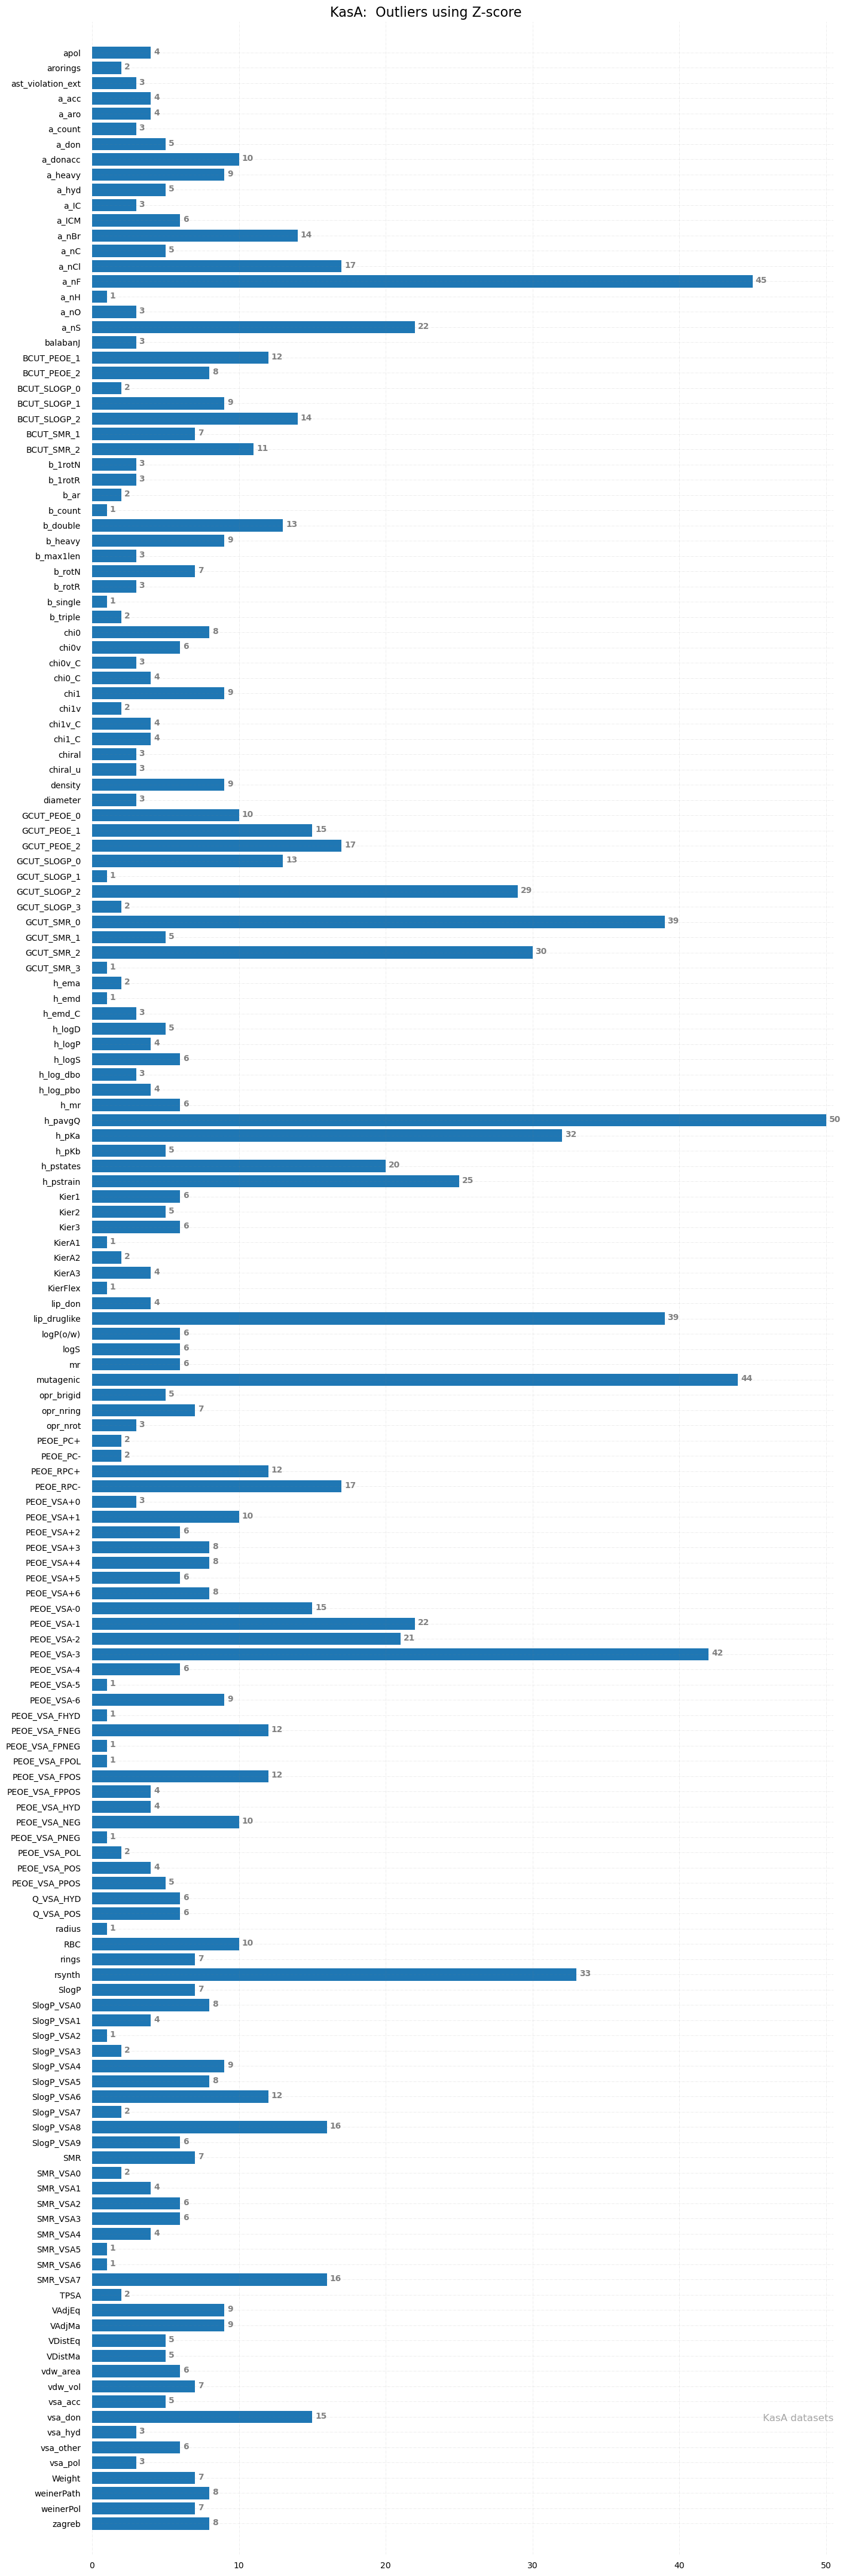

In [55]:
da.get_Outliers(data_descriptors, 3, True, dataset)

#### 11. Feature Distribution

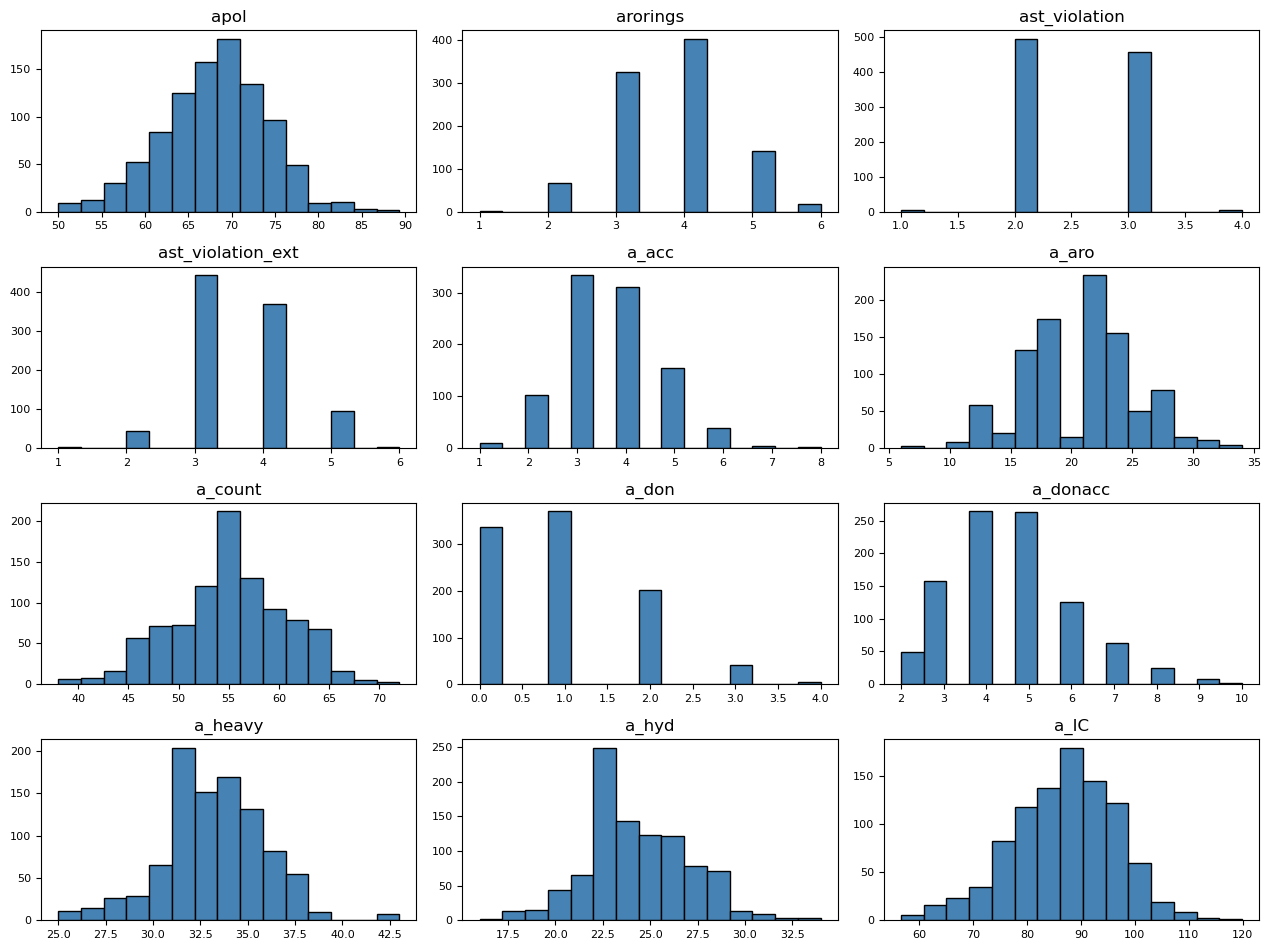

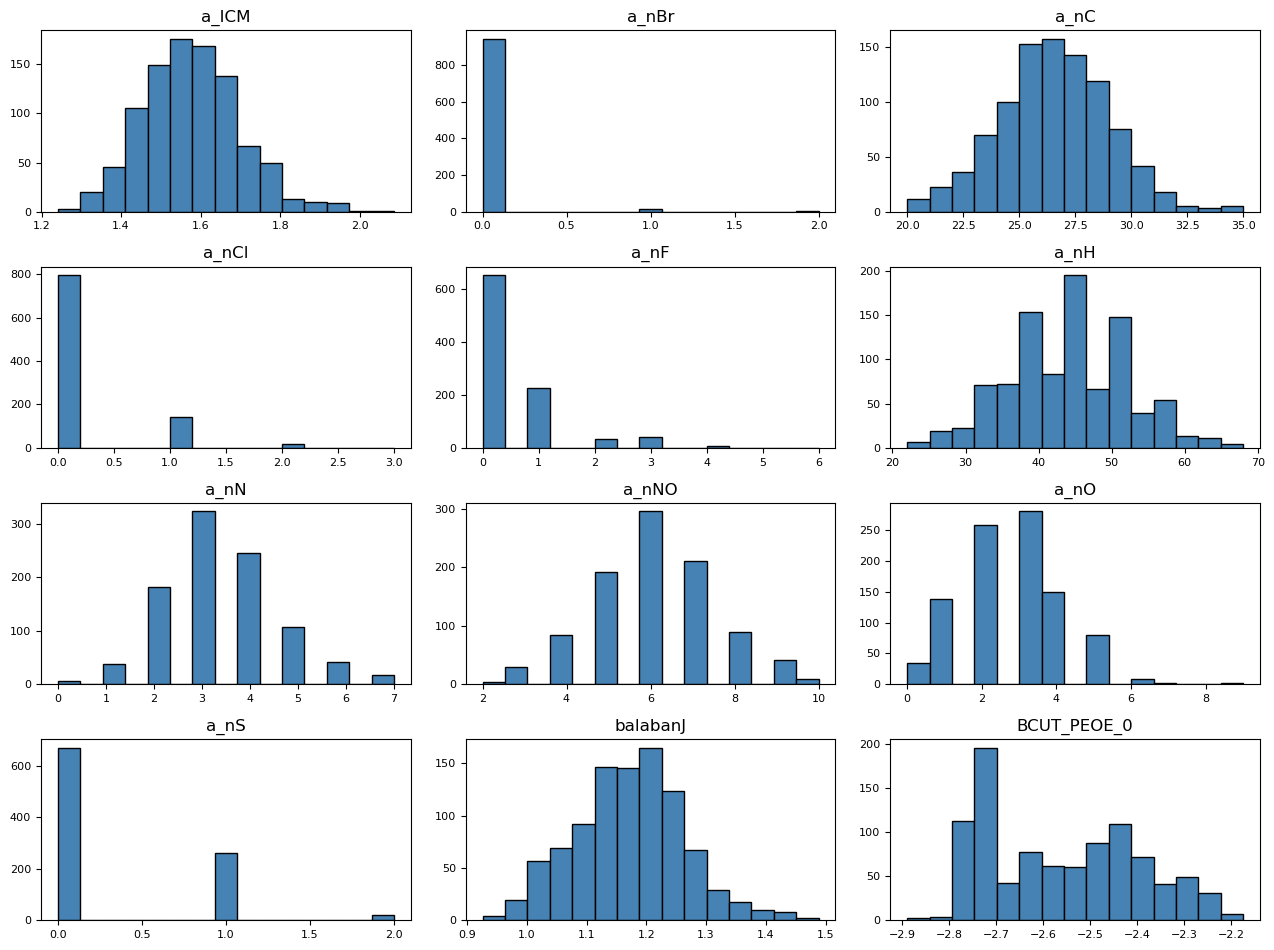

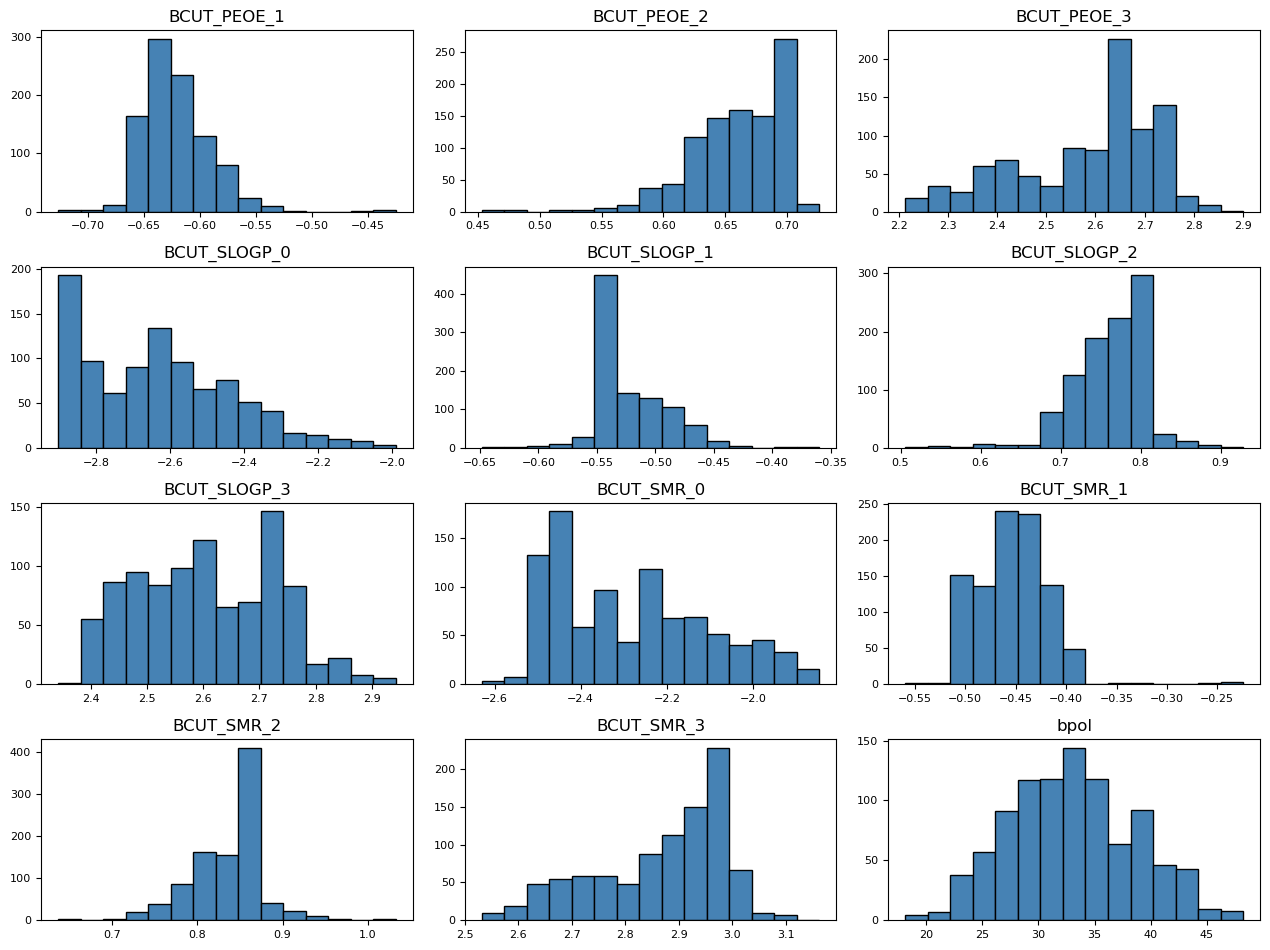

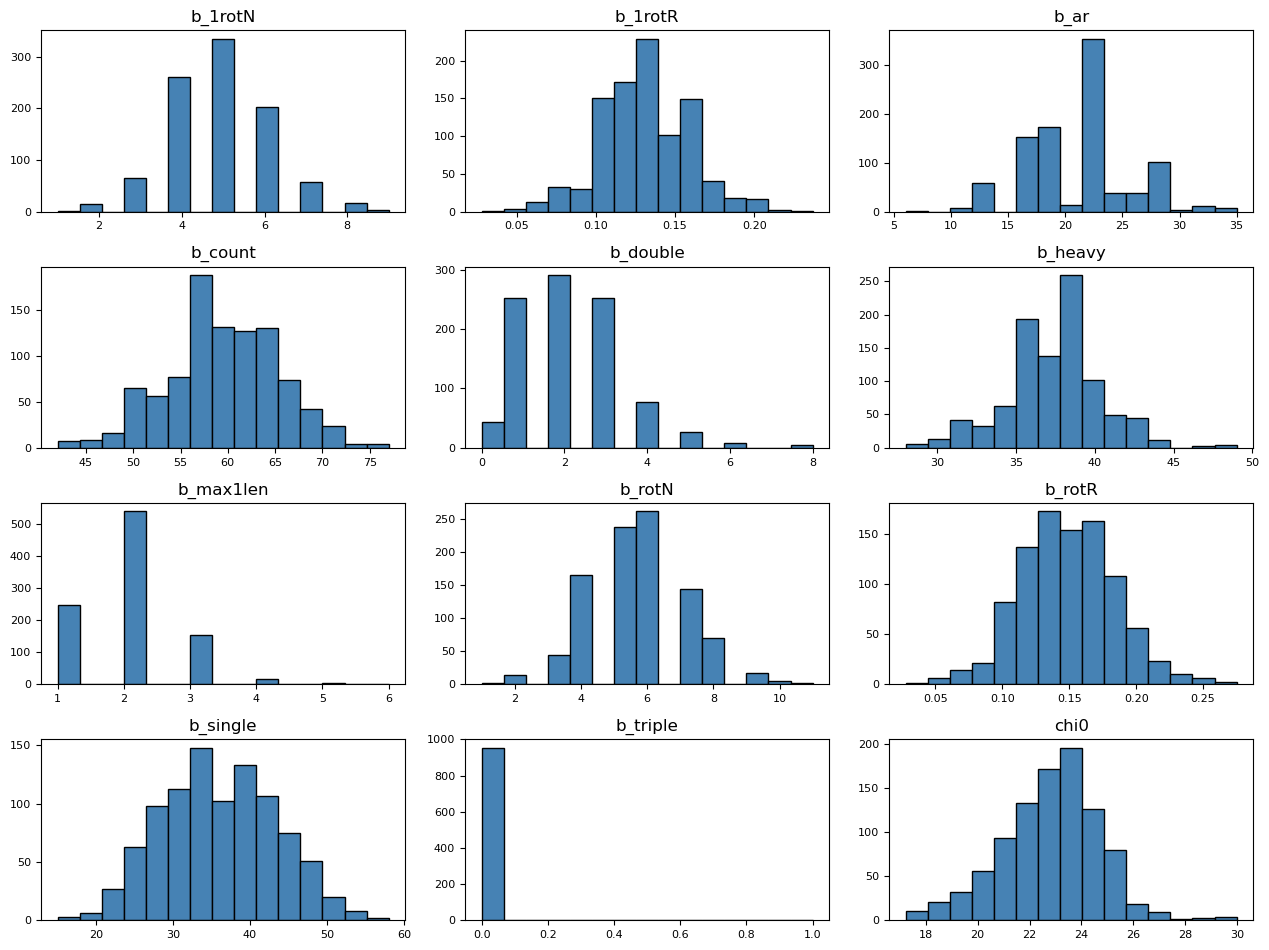

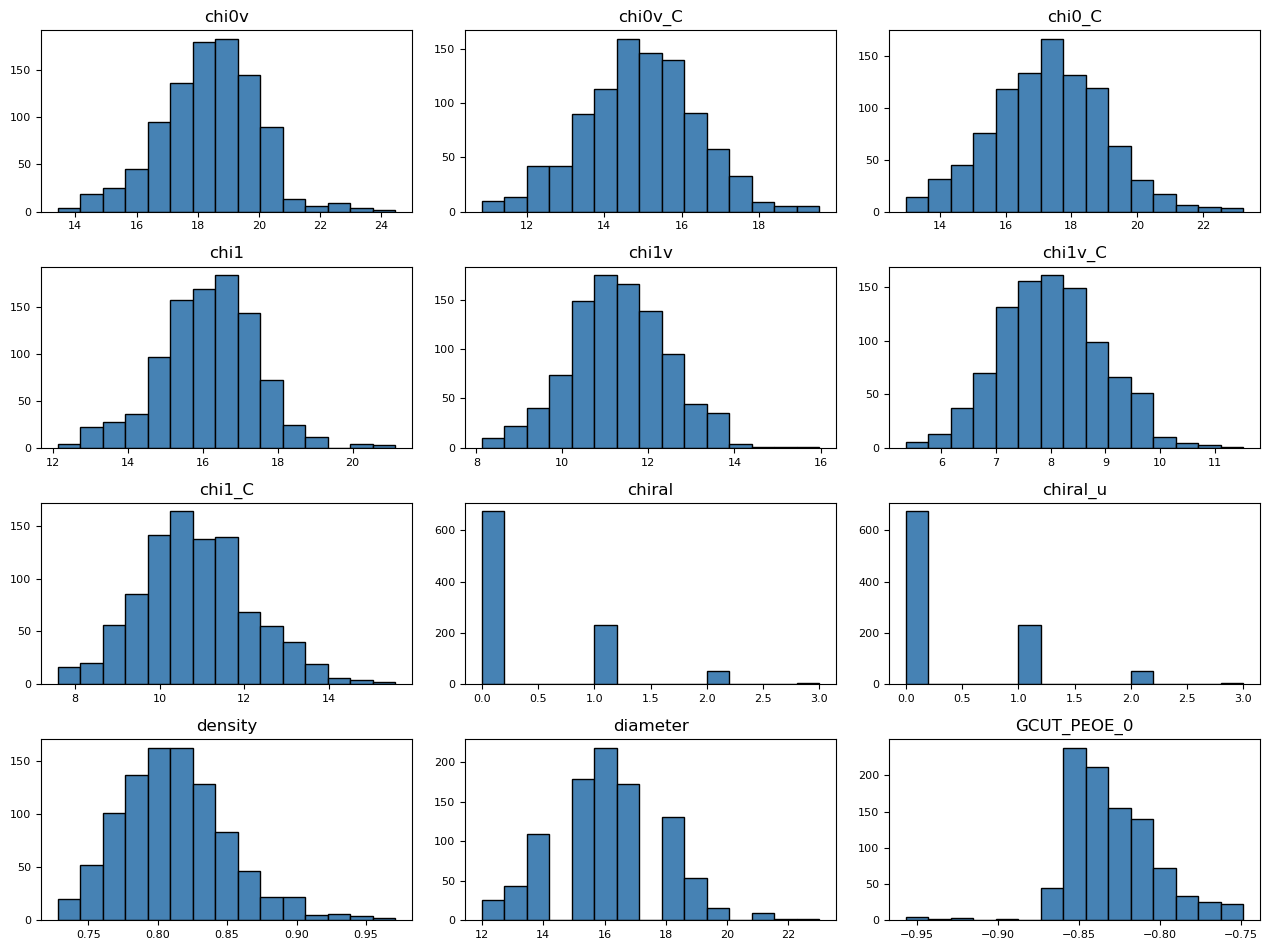

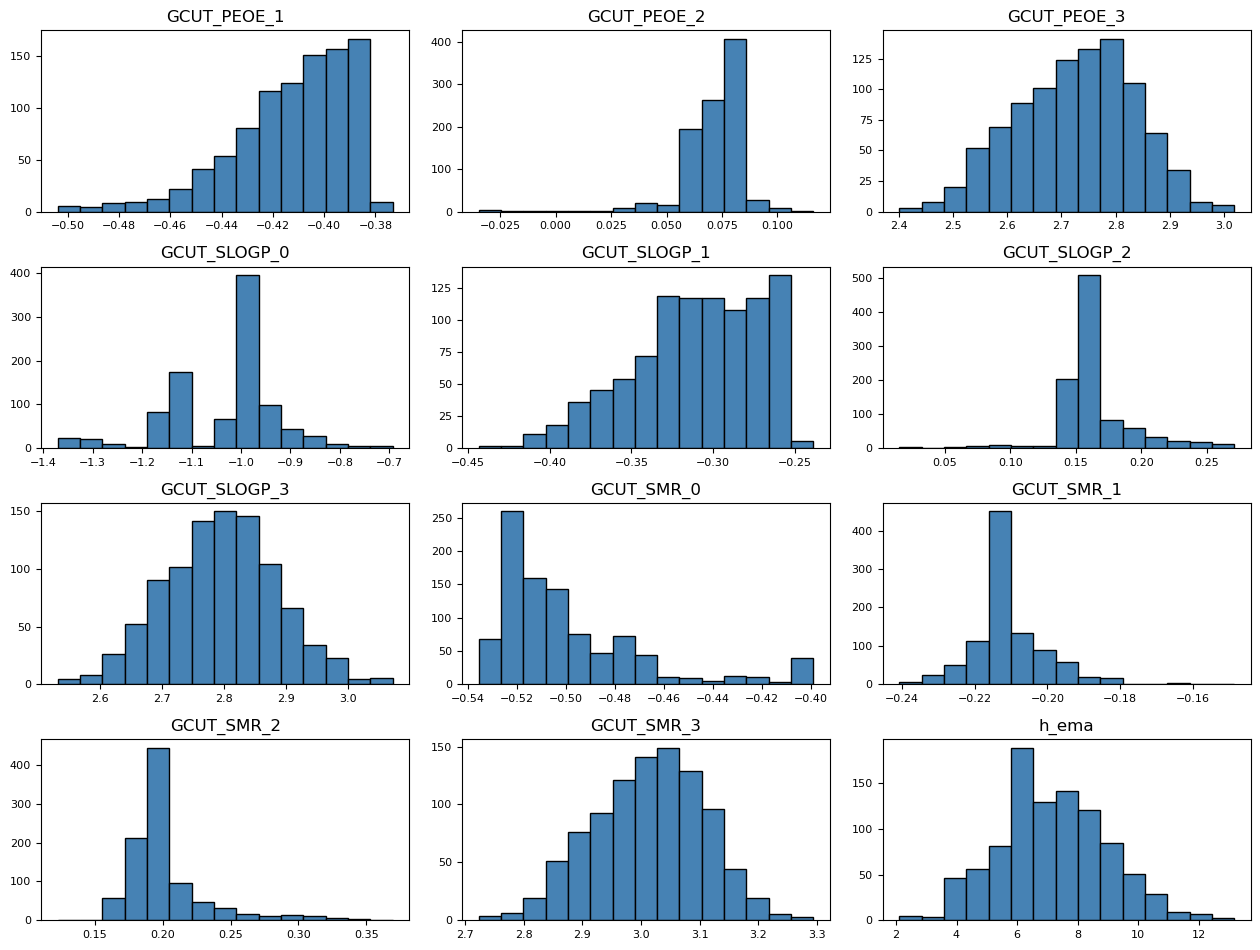

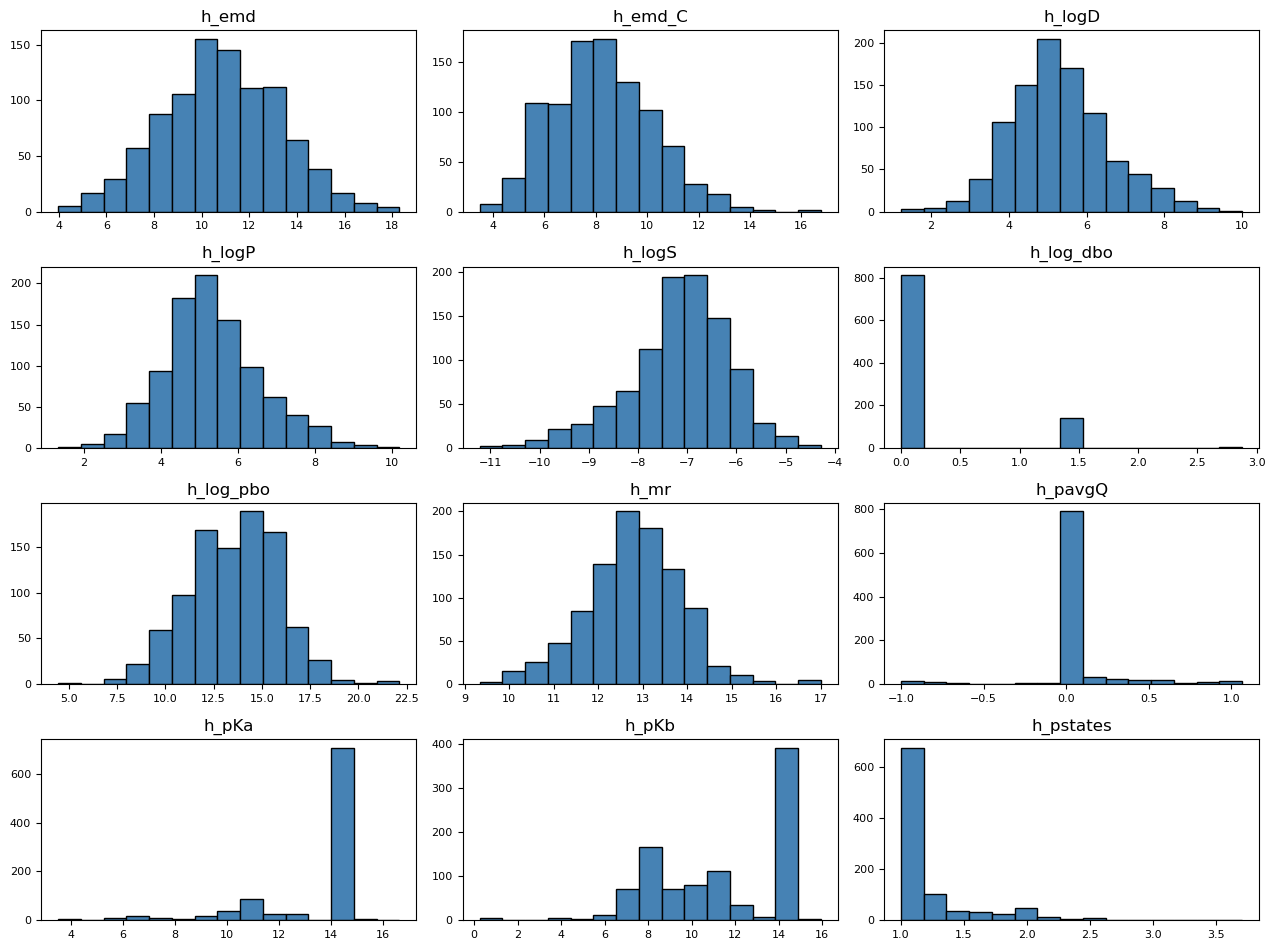

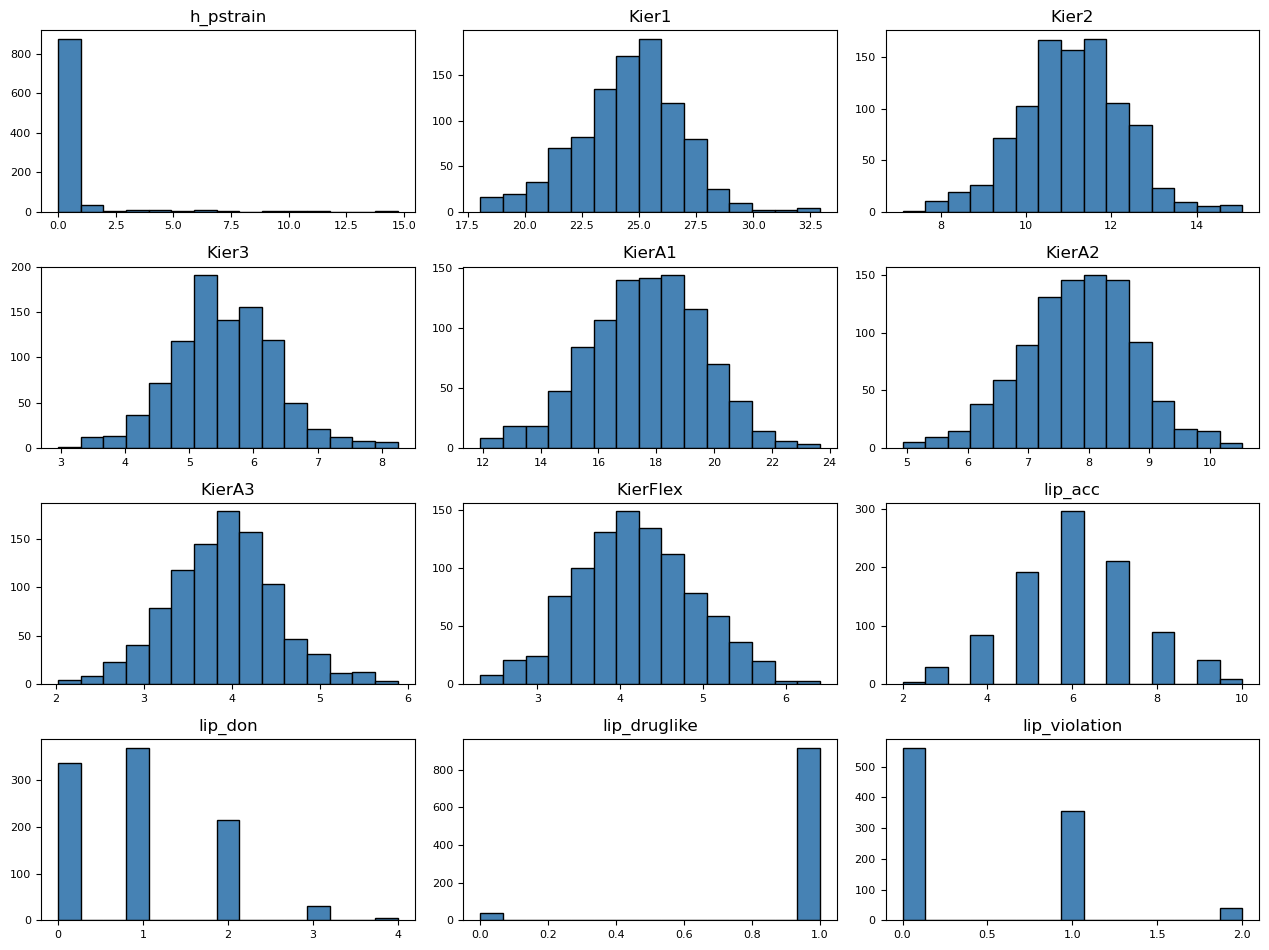

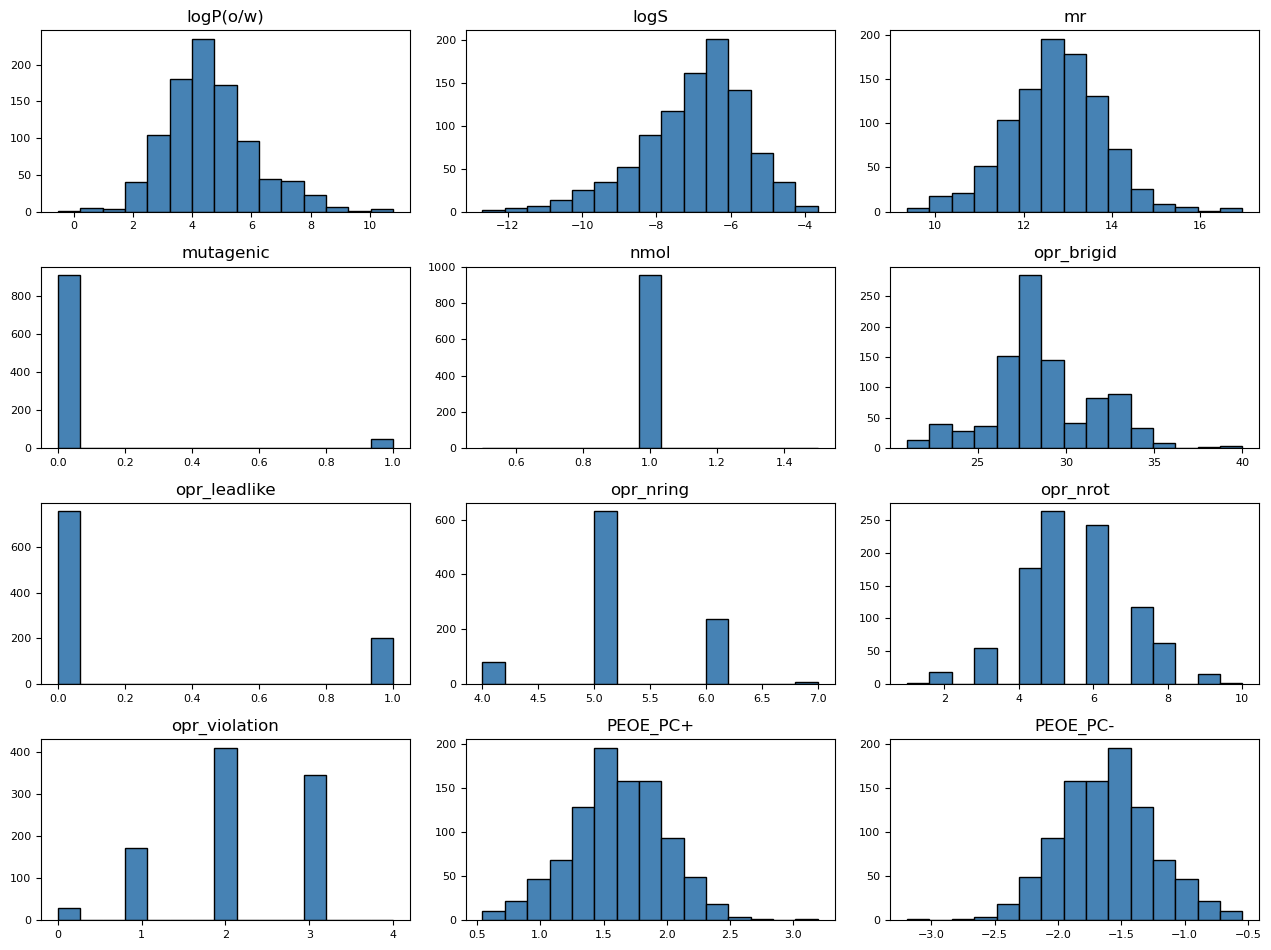

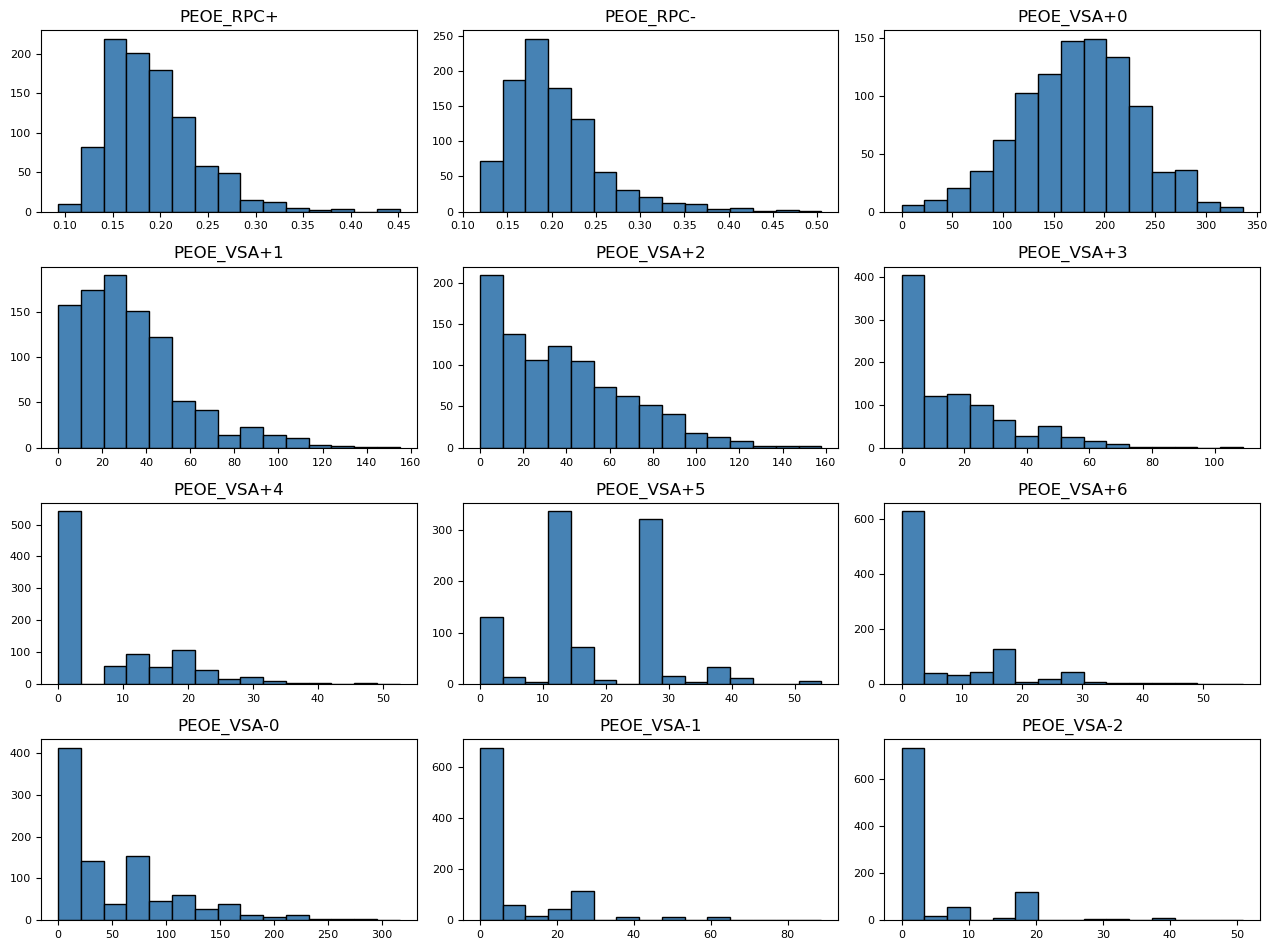

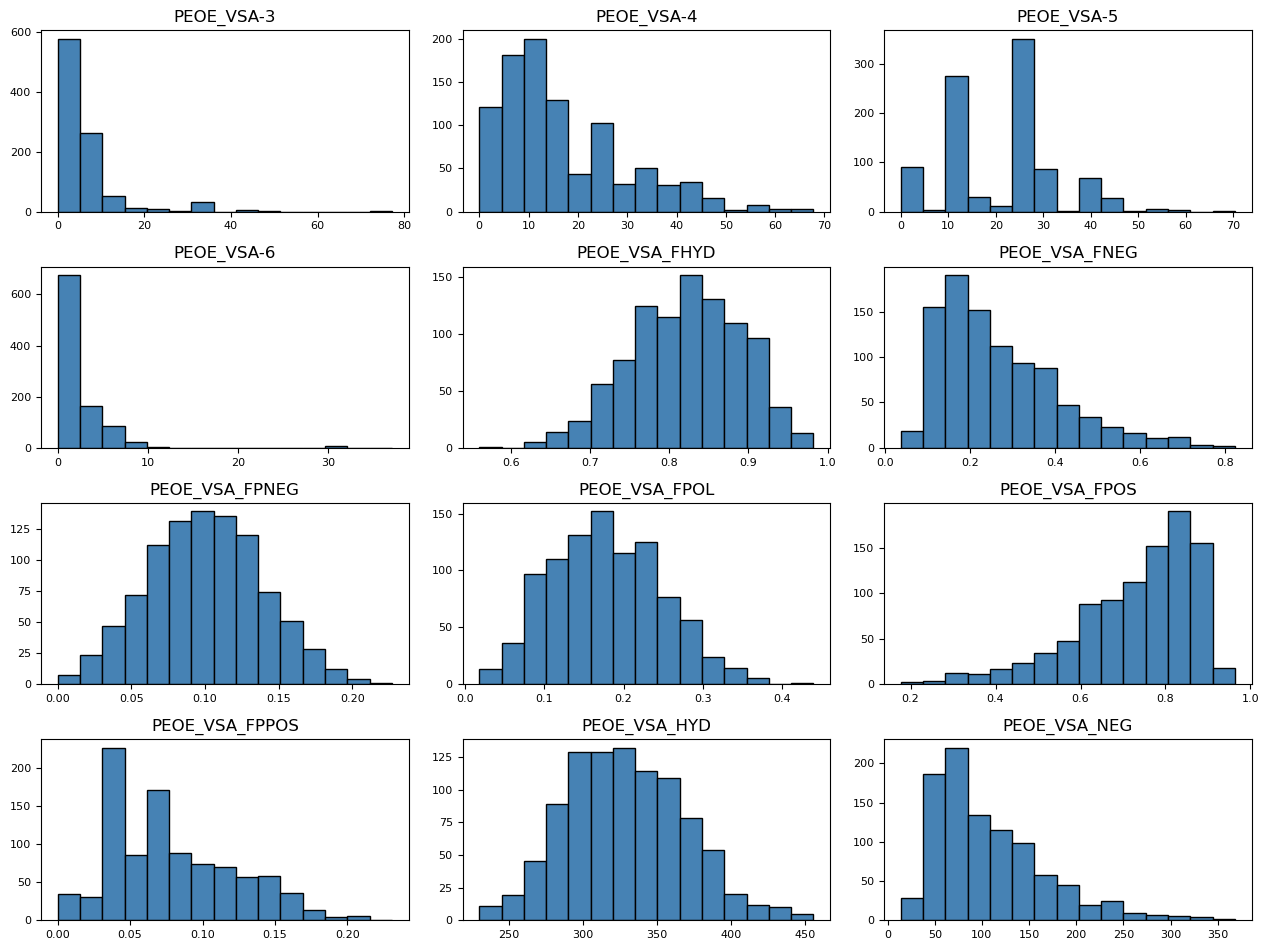

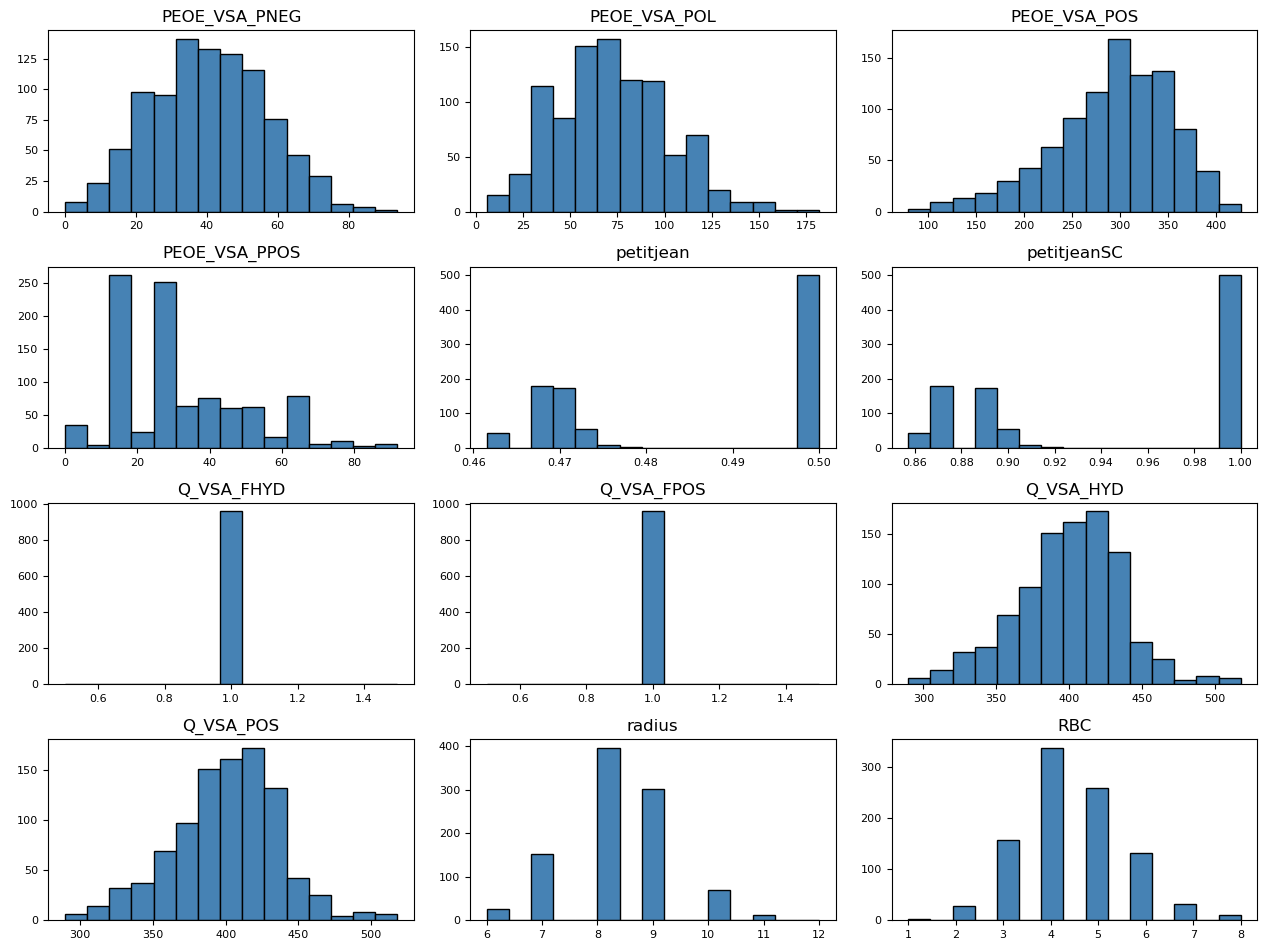

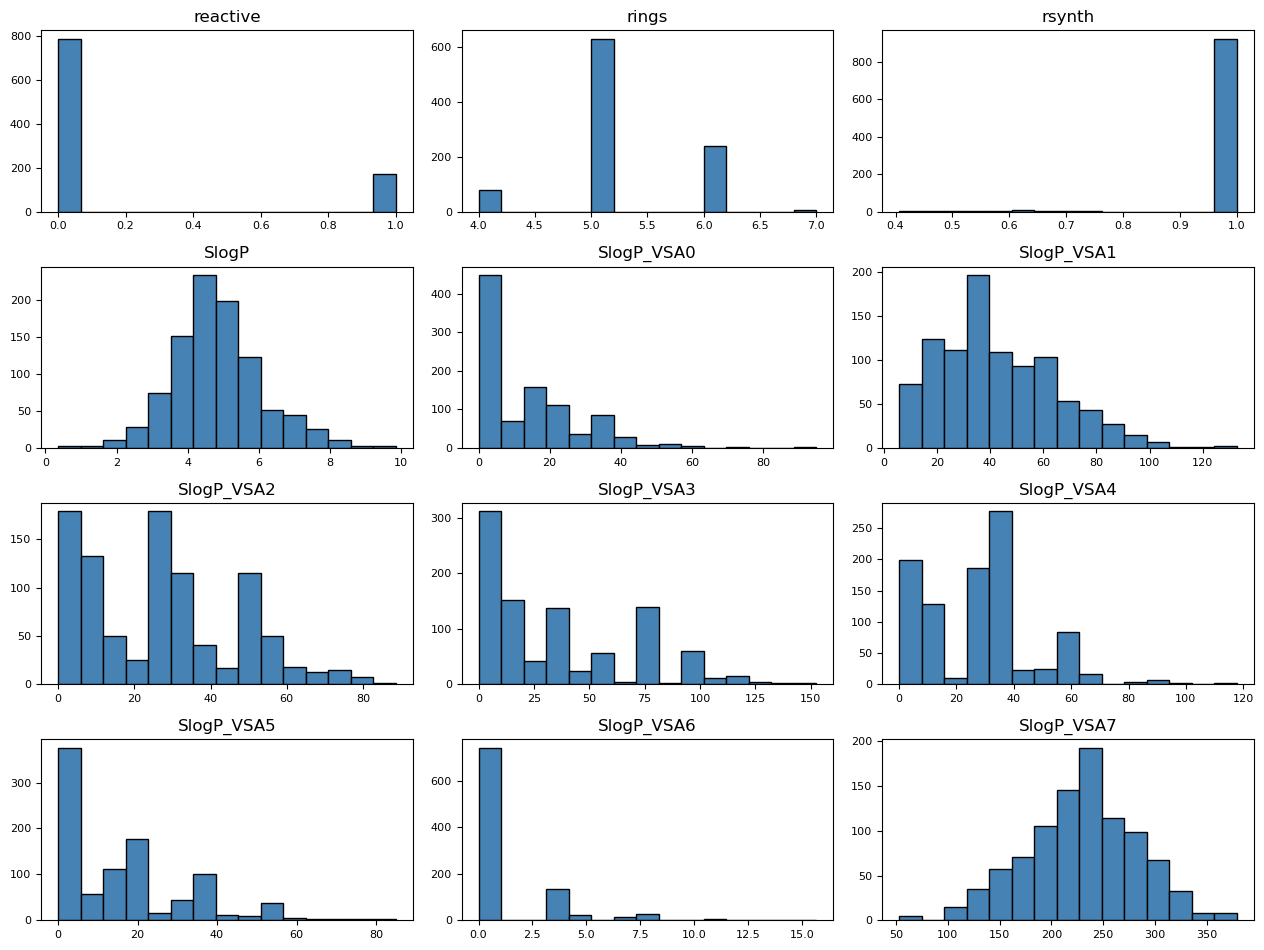

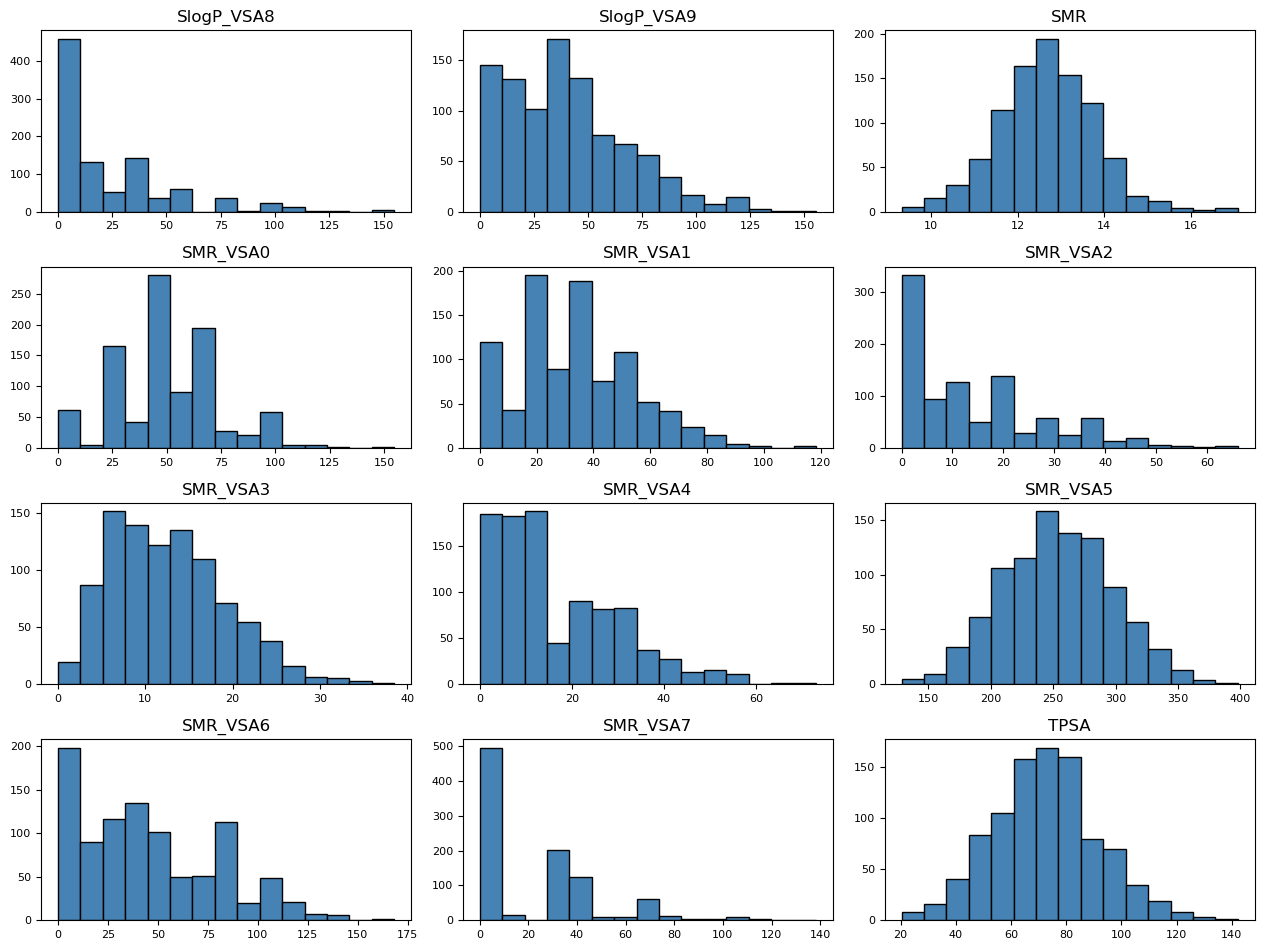

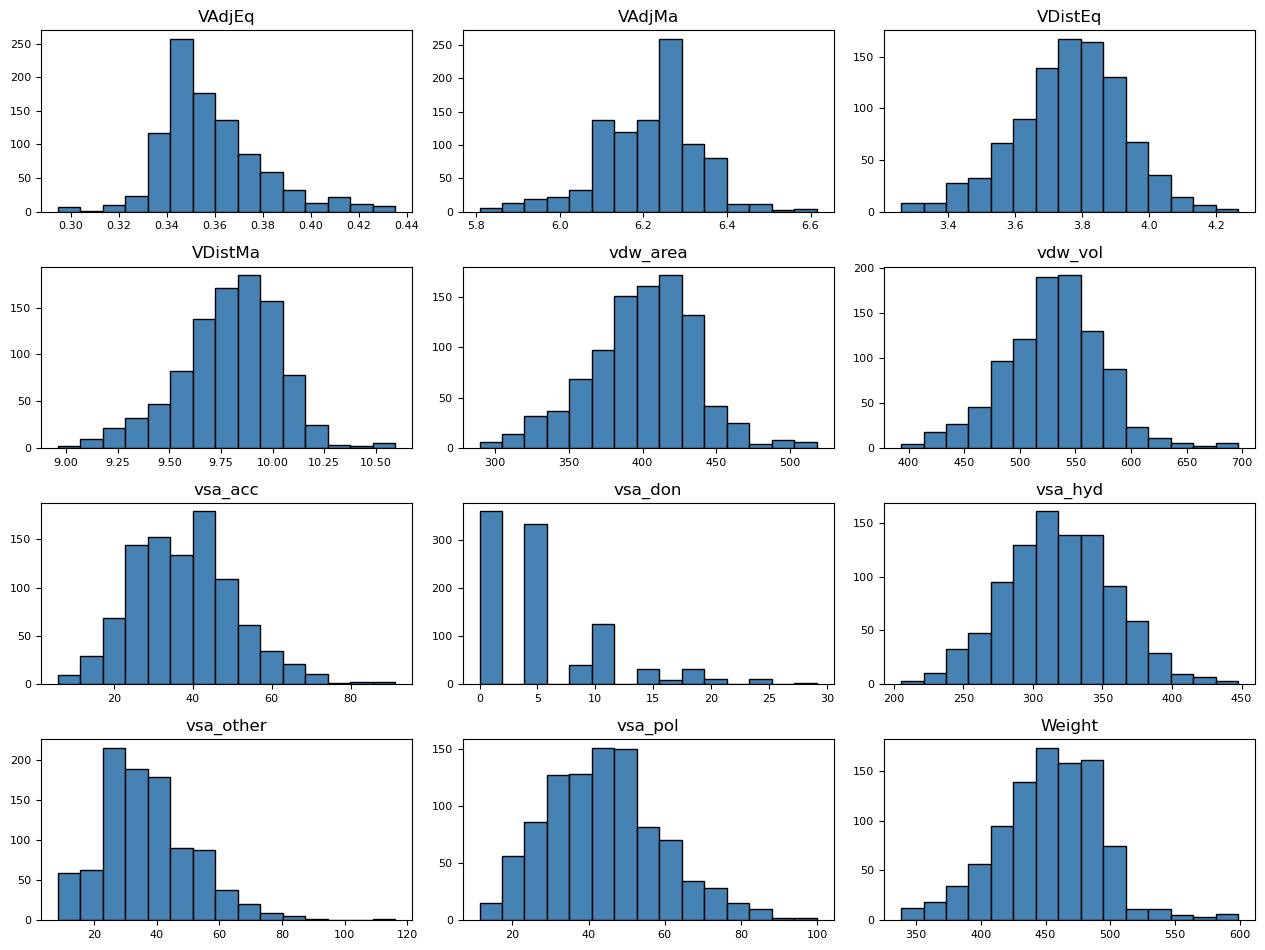

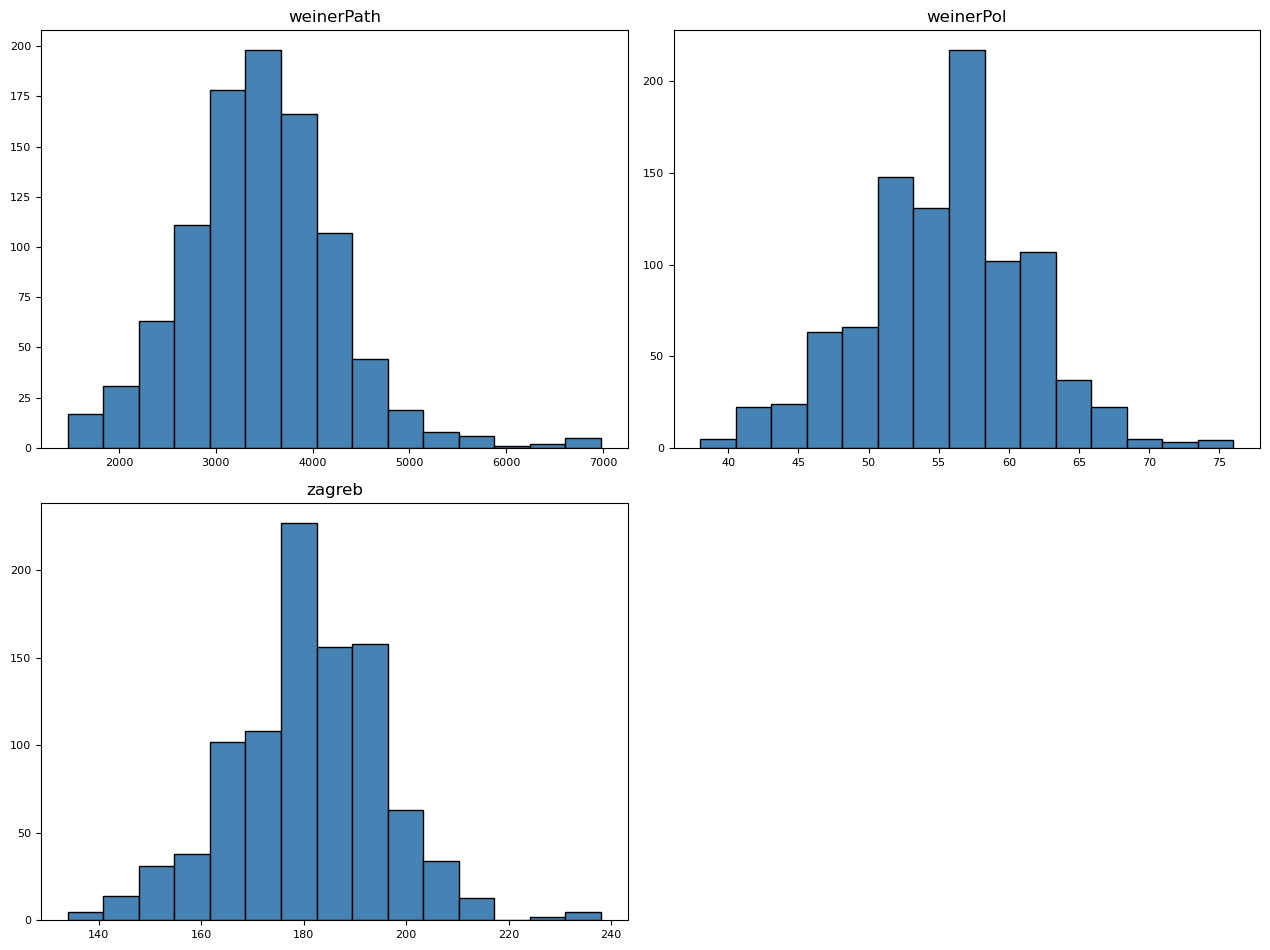

In [17]:
da.plot_FeatureDistribution(data_descriptors)

#### 12.  Scale Features

In [33]:
# Dataset was split in data analysis notebook into 2 separate files:  
# Descriptors.csv:  processed unscaled 2D descriptors. used for scoring.
# Molecules.csv:  contains MoleculeId, SMILES, SaltStripping, Cluster
file_2Descriptors = f'{data_path_scoring}Descriptors{suffix}.csv'
file_Molecules = f'{data_path_scoring}Molecules{suffix}.csv'
file_TrainingData = f'{data_path}{filename_data_train}@suffix.csv'
file_scalar = f'{data_path}scaler_std@suffix.sclr'
file_ScaledData = f'{data_path_scoring}DescriptorsScaled{suffix}@suffix.csv'

suffixes = [suffix_TAACF, suffix_MLSMR]

# first time in = True:  get the data and scale it
# first time in = False:  retrieve saved scaled data
# returns molecules, 2D features scaled, name of training features
FirstTimeIn = False
for s in suffixes:
    file_TrainingData_ = file_TrainingData.replace('@suffix', s)
    file_scalar_ = file_scalar.replace('@suffix', s)
    file_ScaledData_ = file_ScaledData.replace('@suffix', s)

    score.scale_dataset(file_2Descriptors, file_Molecules, file_TrainingData_, file_scalar_, file_ScaledData_, FirstTimeIn=FirstTimeIn)

#### 13.  Make Predictions

##### &nbsp;&nbsp;&nbsp;&nbsp;13.1&nbsp; Variables

In [68]:
scoring_datasets = [TAACF, TAACF, MLSMR, MLSMR]
dataset_suffixes = [suffix_TAACF, suffix_TAACF, suffix_MLSMR, suffix_MLSMR]
models = ['wrf', 'crf','wrf', 'rfu']
metrics = ['f1', 'f1', 'f1', 'f1']
bestth_roc = [0.254, 0.032, 0.212, 0.282]
bestth_PrecRecal = [0.540, 0.127, 0.483, 0.606]

dfActive = pd.DataFrame(columns=['No Th', 'ROC Th', 'PR Th', 'Shared'])

##### &nbsp;&nbsp;&nbsp;&nbsp;13.2&nbsp; Instantiate Model and Make Predictions

In [70]:
for scoring_dataset, suffix, model, metric, th_roc, th_pr,  \
    in zip(scoring_datasets, dataset_suffixes, models, metrics, bestth_roc, bestth_PrecRecal):

    filename = f'{model}_{metric}'
    file_model = f'{model_path}{filename}{suffix}.mdl'
    file_pred = f'{data_path_scoring}{filename}_y_pred_{dataset}{suffix}.csv'
    file_probs = f'{data_path_scoring}{filename}_y_probs_{dataset}{suffix}.csv'
    file_images = f'{image_path_scoring}{filename}@filename{dataset}{suffix}'
    file_ScaledData = f'{data_path_scoring}DescriptorsScaled_{dataset}{suffix}.csv'
    file_Predictions = f"{data_path_scoring}{filename}Predictions_{dataset}{suffix}.csv"
    file_PredictionsTally = f"{data_path_scoring}{filename}PredictionsTally_{dataset}{suffix}.csv"
    file_MolScores = f"{data_path_scoring}{filename}Thresholds_{dataset}{suffix}.csv"
    file_Molecules = f'{data_path}Molecules_{dataset}.csv'

    # get scaled data
    data_features_scaled = pd.read_csv(f'{file_ScaledData}', index_col=0)
    data_molecules = pd.read_csv(file_Molecules, index_col=0)

    #print(file_Predictions)

    # FirstTimeIn = True:  score dataset and save results
    # FirstTimeIn = False:  get saved model/predictions
    FirstTimeIn = True
    rfClassifier, y_pred, y_probs = score.score_dataset(file_model, data_features_scaled, file_pred, file_probs, FirstTimeIn=FirstTimeIn)

    # set predictions based on thresholds
    # returns molecules scored and the prediction totals    
    index_name = f'{scoring_dataset} {model.upper()} Optimized for {metric.upper()}'
    dfPredictions, dfActive = score.predict_dataset(data_molecules, dfActive, y_probs, y_pred, th_roc, th_pr, file_Predictions, index_name)

    # save predictions
    dfPredictions.to_csv(f"{file_Predictions}")
    dfActive.to_csv(f"{file_PredictionsTally}")    


title = f'KasA Docked:  Predictions<br>by {TAACF} & {MLSMR} Models'
score.format_df(dfActive, title)

,No Th,ROC Th,PR Th,Shared
TAACF WRF Optimized for F1,10,322,6,6
TAACF CRF Optimized for F1,0,249,37,0
MLSMR WRF Optimized for F1,25,563,29,25
MLSMR RFU Optimized for F1,75,482,21,21


#### 14.  Spatial Visualization

##### &nbsp;&nbsp;&nbsp;&nbsp;14.1&nbsp; Variables

In [ ]:
scoring_datasets = [TAACF, TAACF, MLSMR, MLSMR]
dataset_suffixes = [suffix_TAACF, suffix_TAACF, suffix_MLSMR, suffix_MLSMR]
models = ['wrf', 'crf','wrf', 'rfu']
metrics = ['f1', 'f1', 'f1', 'f1']
bestth_roc = [0.254, 0.032, 0.212, 0.282]
bestth_PrecRecal = [0.540, 0.127, 0.483, 0.606]

dfActive = pd.DataFrame(columns=['No Th', 'ROC Th', 'PR Th', 'Shared'])

file_Molecules = f'{data_path}Molecules_{dataset}.csv'
data_molecules = pd.read_csv(file_Molecules, index_col=0)

##### &nbsp;&nbsp;&nbsp;&nbsp;14.2&nbsp; UMAP

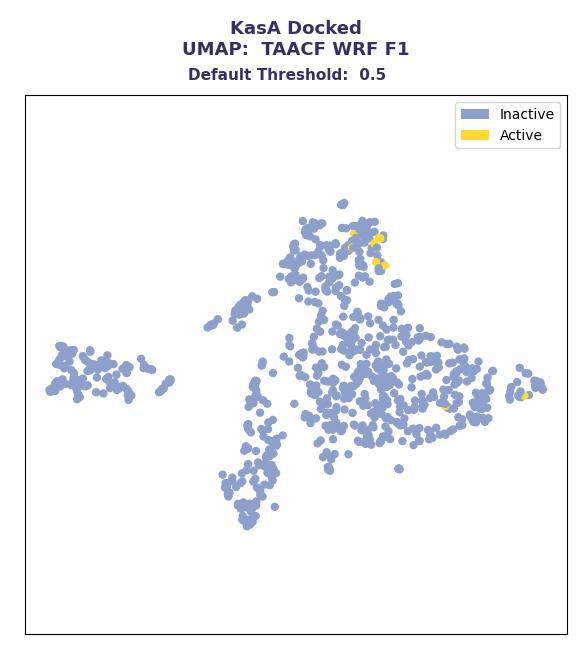

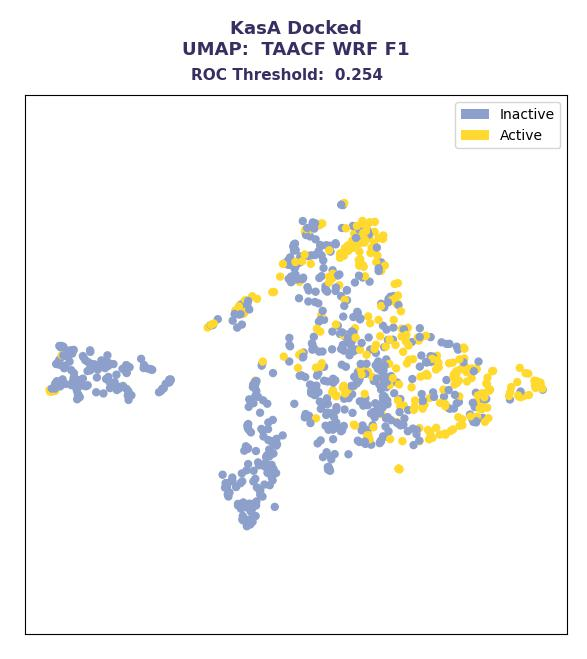

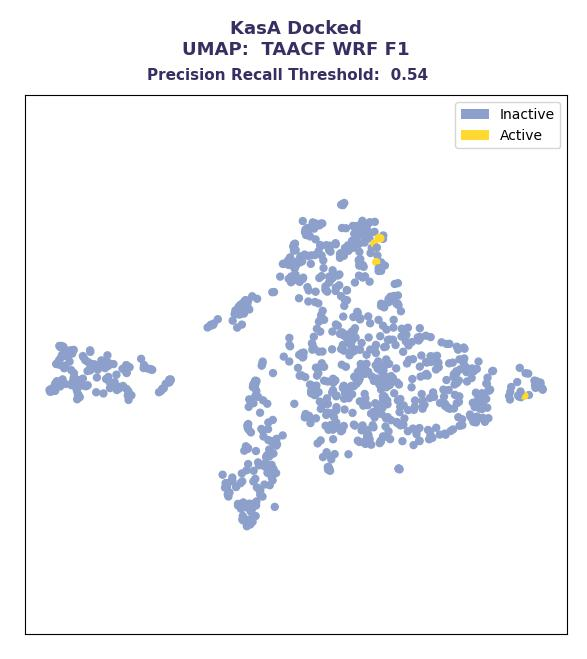

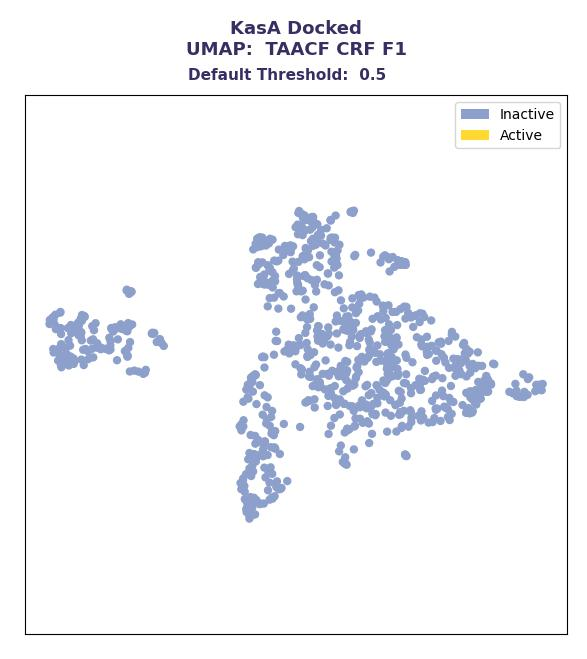

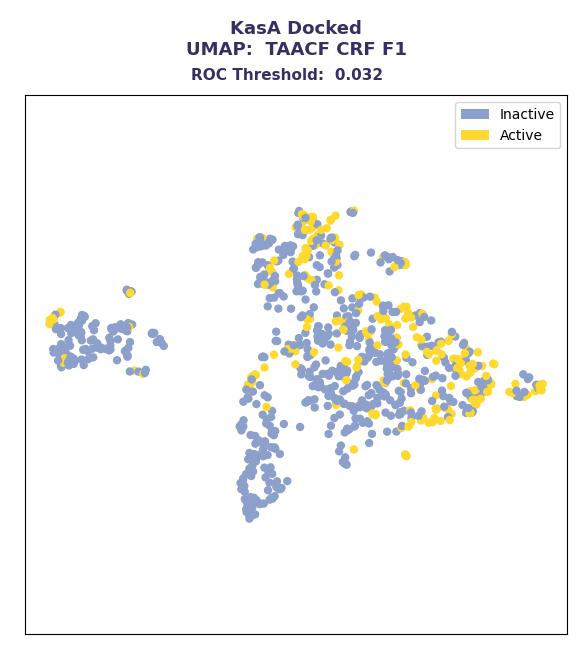

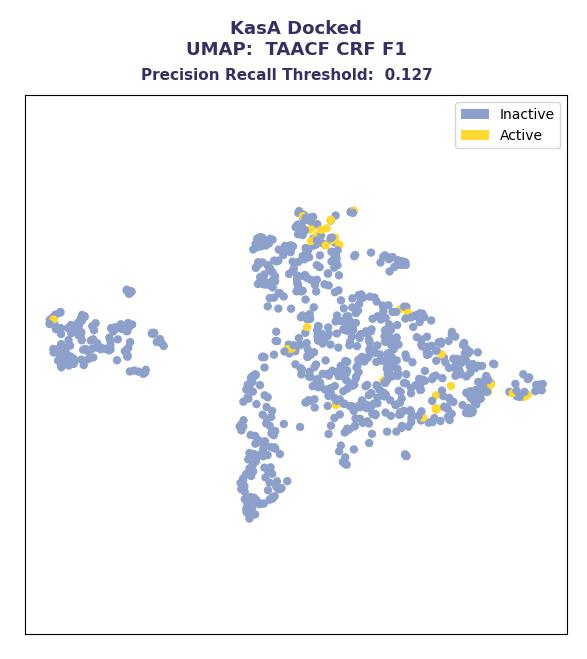

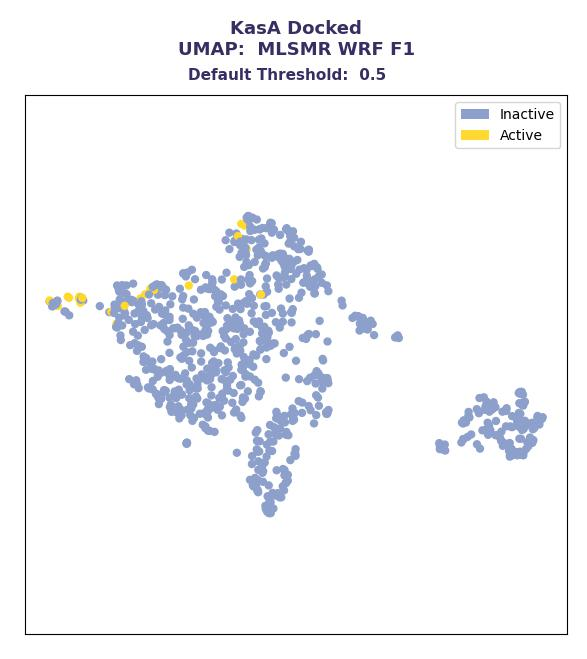

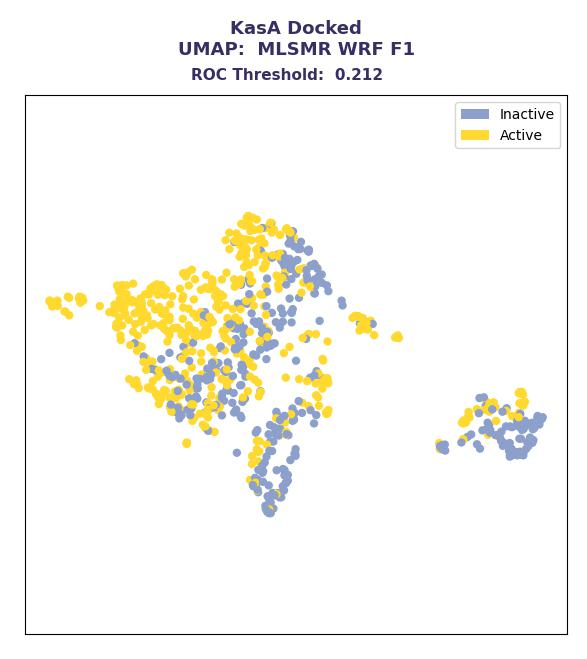

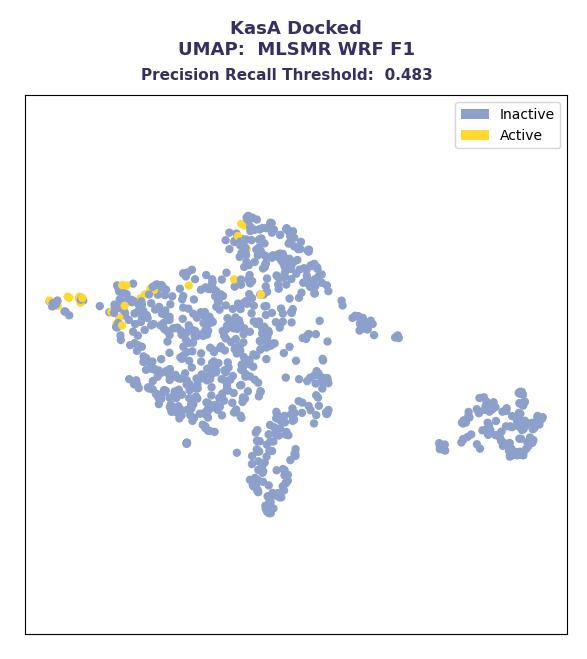

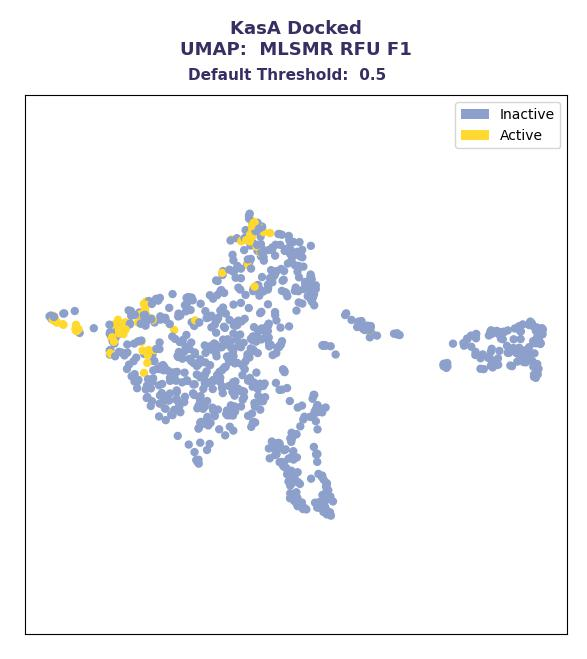

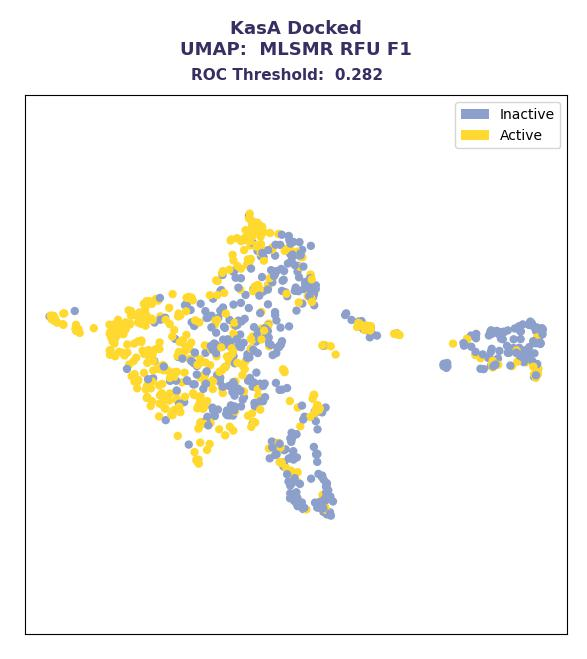

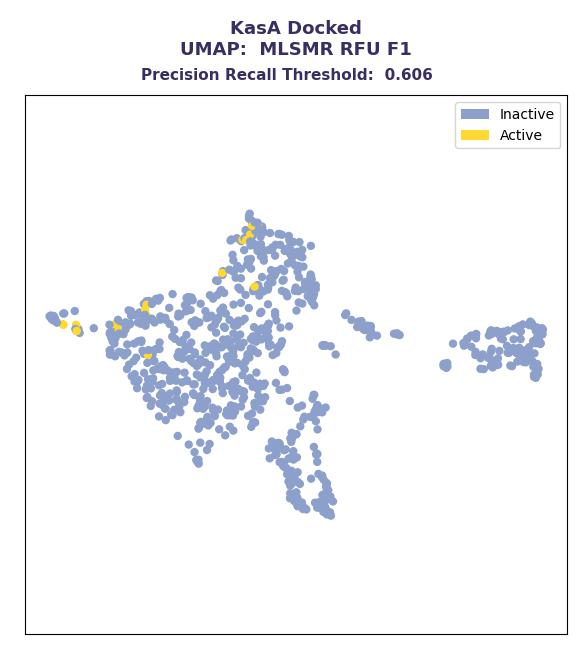

In [72]:
for scoring_dataset, suffix, model, metric, th_roc, th_pr,  \
    in zip(scoring_datasets, dataset_suffixes, models, metrics, bestth_roc, bestth_PrecRecal):

    thresholds = {
        "default": 0.5,
        "roc": th_roc,
        "pr": th_pr
    }
    

    title = f'KasA Docked\nUMAP:  {scoring_dataset} {model.upper()} {metric.upper()}'
    n_components = 2
    filename = f'{model}_{metric}'
    filename_Predictions = f"{data_path_scoring}{filename}Predictions_{dataset}{suffix}.csv"
    filename_model_umap = f'{model_path}{filename}_{dataset}{suffix}_umap.mdl'
    filename_data_umap = f'{data_path_scoring}{filename}_umap_{dataset}{suffix}.csv'
    filename_image_umap = f'{image_path_scoring}{filename}_umap_{dataset}{suffix}'
    file_ScaledData = f'{data_path_scoring}DescriptorsScaled_{dataset}{suffix}.csv'

    # get scaled data and predictions
    data_features_scaled = pd.read_csv(f'{file_ScaledData}', index_col=0)   
    data_predictions = pd.read_csv(f'{filename_Predictions}', index_col=0)  

    params = {'df2DScaled': data_features_scaled, 
          'dfMolScores': data_predictions, 
          'thresholds': thresholds, 
          'n_components': n_components,
          'filename_model': filename_model_umap, 
          'filename_data': filename_data_umap,
          'filename_image': filename_image_umap,
          'title': title,
          'getSavedModel': False}

    score.predict_dataset_umap(**params) 

##### &nbsp;&nbsp;&nbsp;&nbsp;14.3&nbsp; tSNE

c:\Users\frogi\anaconda3\envs\tb\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


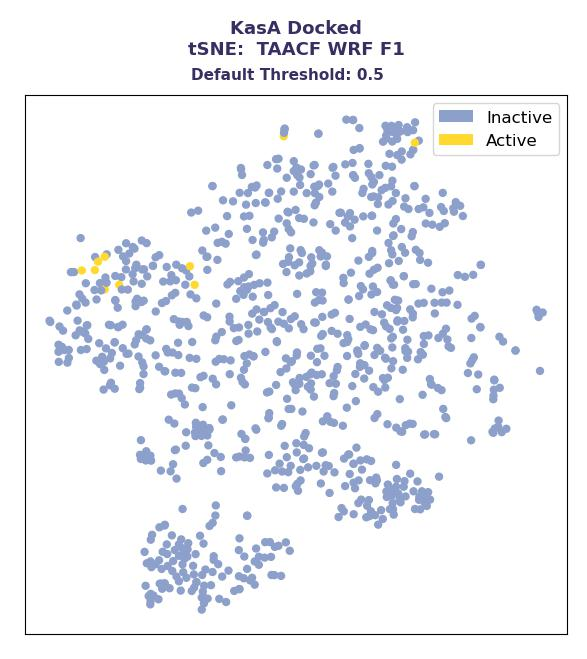

c:\Users\frogi\anaconda3\envs\tb\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


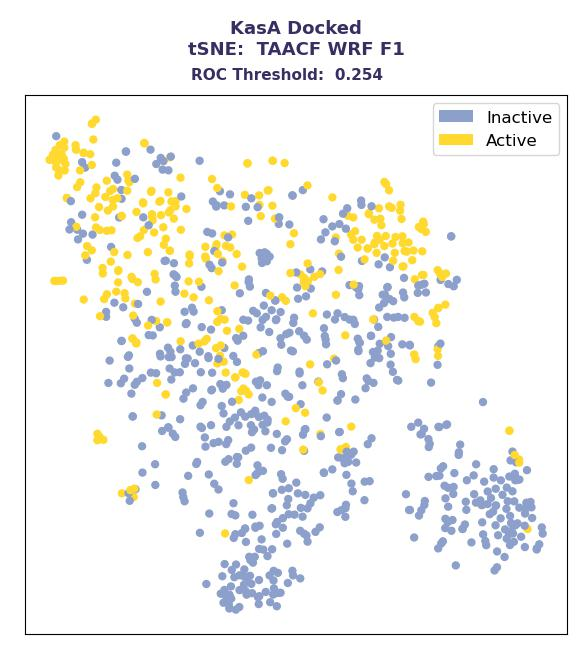

c:\Users\frogi\anaconda3\envs\tb\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


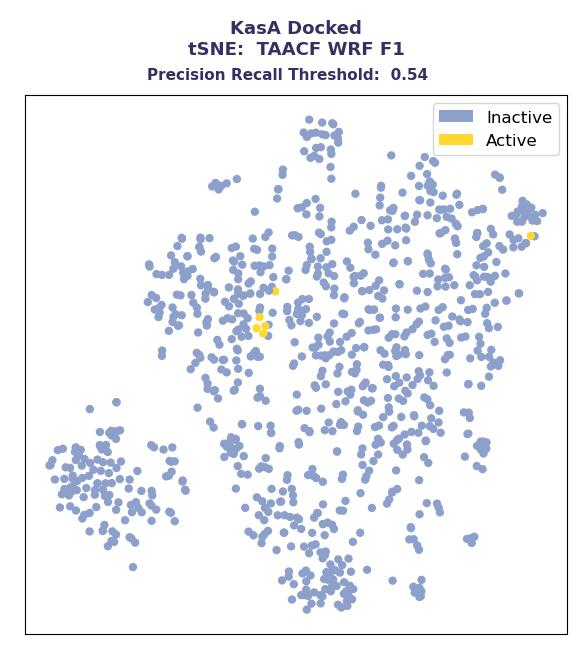

c:\Users\frogi\anaconda3\envs\tb\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


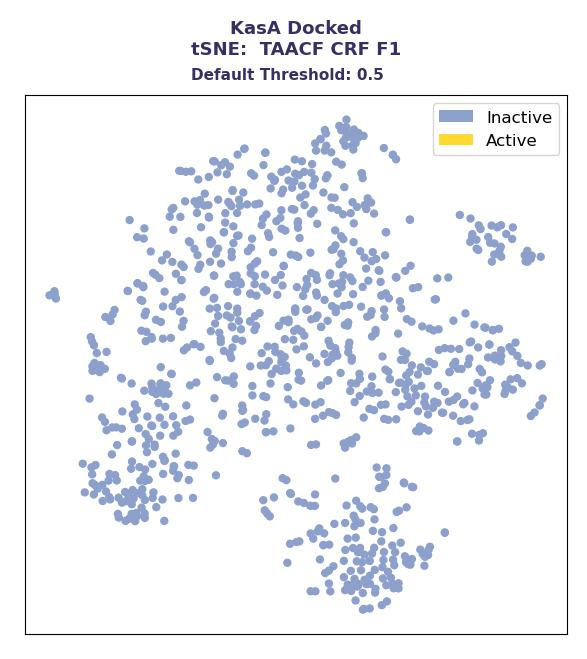

c:\Users\frogi\anaconda3\envs\tb\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


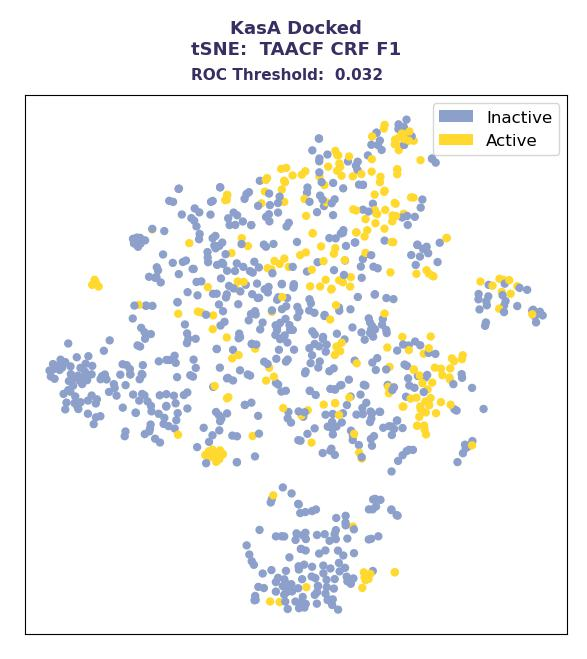

c:\Users\frogi\anaconda3\envs\tb\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


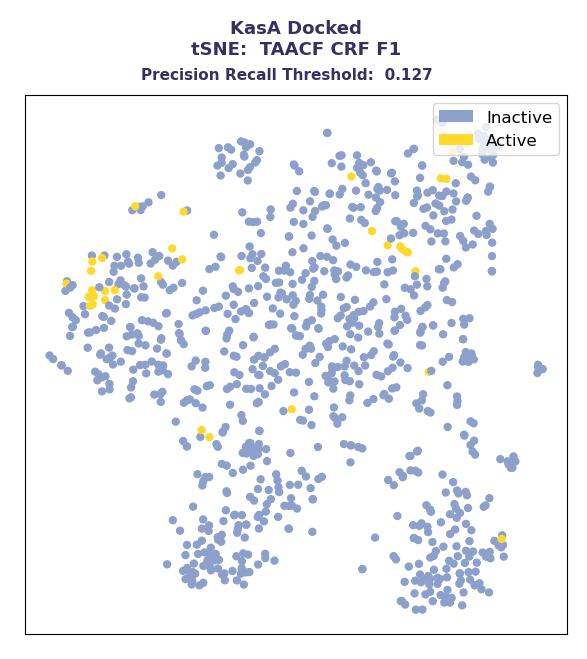

c:\Users\frogi\anaconda3\envs\tb\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


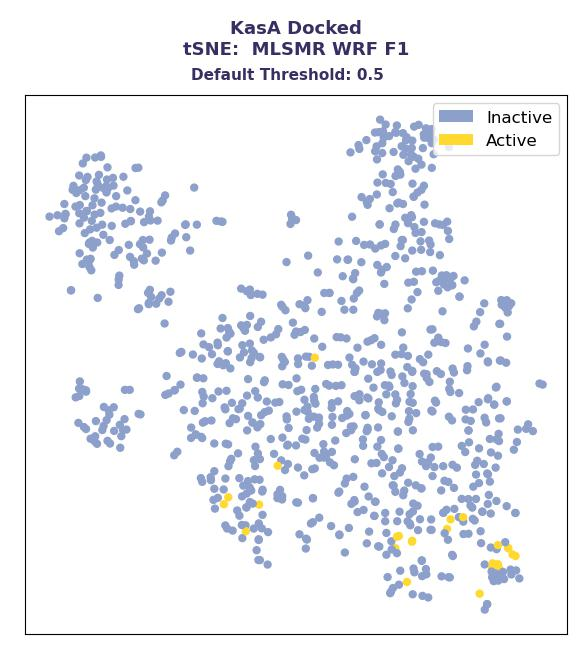

c:\Users\frogi\anaconda3\envs\tb\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


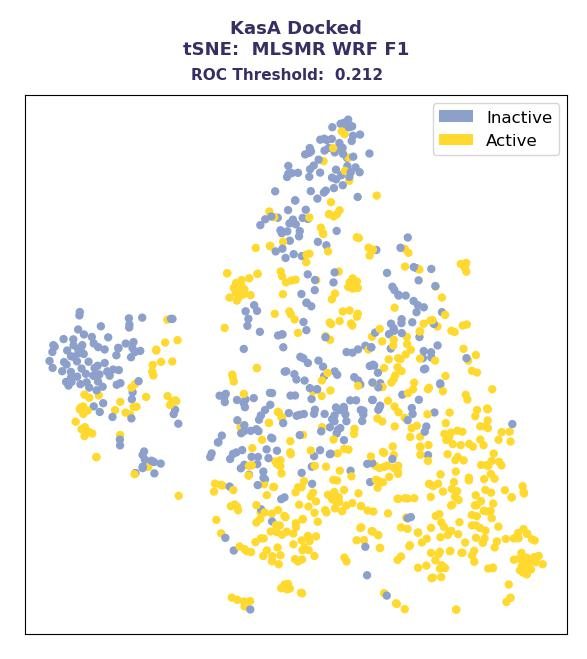

c:\Users\frogi\anaconda3\envs\tb\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


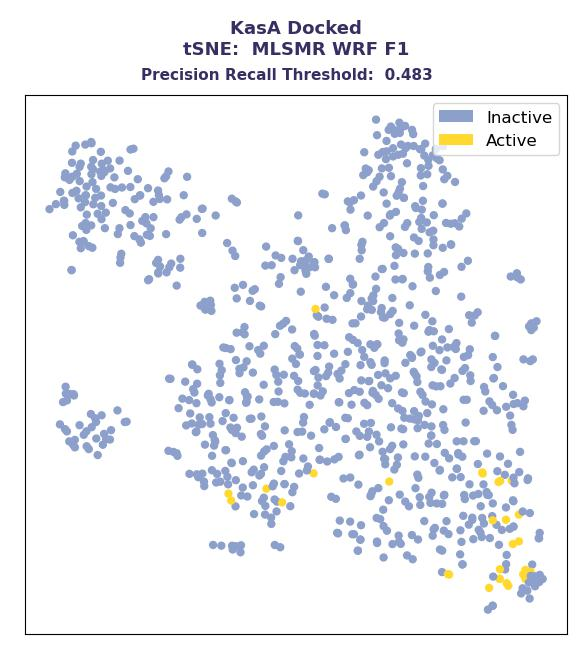

c:\Users\frogi\anaconda3\envs\tb\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


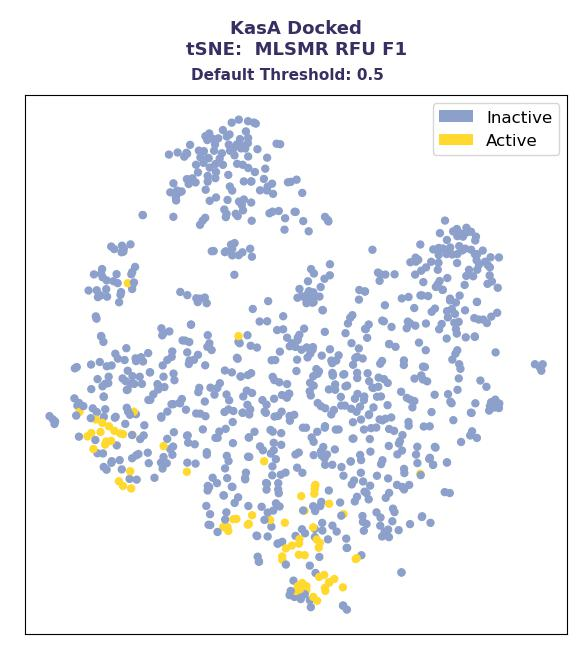

c:\Users\frogi\anaconda3\envs\tb\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


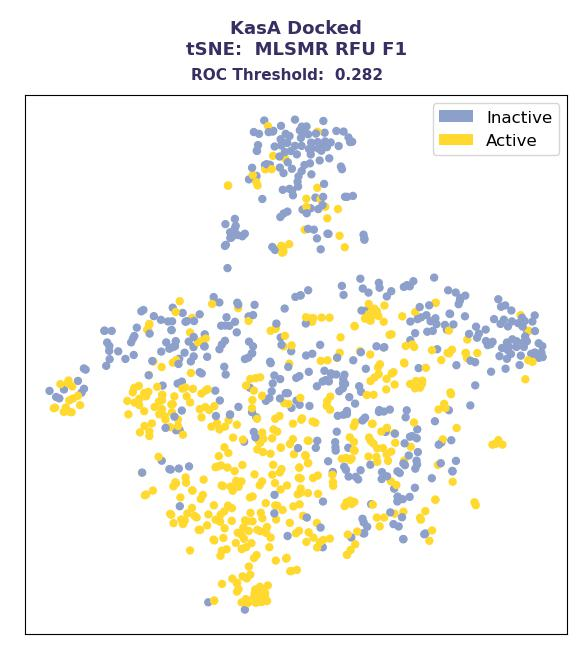

c:\Users\frogi\anaconda3\envs\tb\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


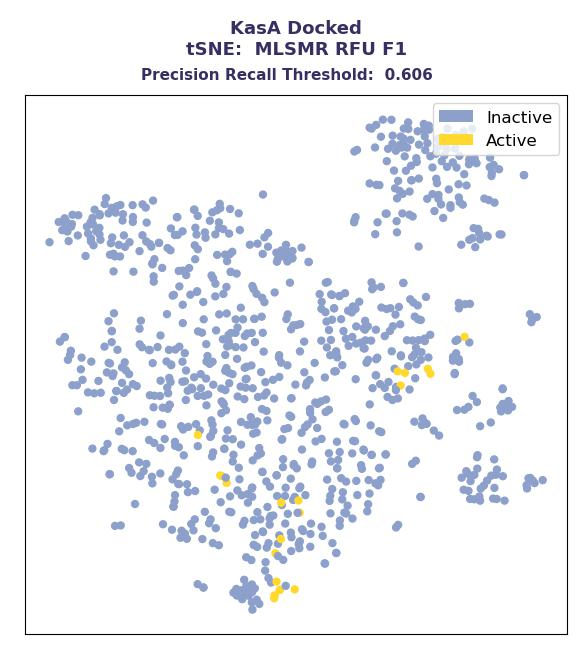

In [74]:
for scoring_dataset, suffix, model, metric, th_roc, th_pr,  \
    in zip(scoring_datasets, dataset_suffixes, models, metrics, bestth_roc, bestth_PrecRecal):

    thresholds = {
        "default": 0.5,
        "roc": th_roc,
        "pr": th_pr
    }
    

    title = f'KasA Docked\ntSNE:  {scoring_dataset} {model.upper()} {metric.upper()}'
    pc_num = 20

    filename = f'{model}_{metric}'
    filename_Predictions = f"{data_path_scoring}{filename}Predictions_{dataset}{suffix}.csv"
    filename_model = f'{model_path}{filename}_{dataset}{suffix}_tsne.mdl'
    filename_data = f'{data_path_scoring}{filename}_tsne_{dataset}{suffix}.csv'
    filename_image = f'{image_path_scoring}{filename}_tsne_{dataset}{suffix}'
    file_ScaledData = f'{data_path_scoring}DescriptorsScaled_{dataset}{suffix}.csv'

    # get scaled data and predictions
    data_features_scaled = pd.read_csv(f'{file_ScaledData}', index_col=0)   
    data_predictions = pd.read_csv(f'{filename_Predictions}', index_col=0)  

    params = {'df2DScaled': data_features_scaled, 
          'dfMolScores': data_predictions, 
          'thresholds': thresholds, 
          'pc_num': pc_num,
          'filename_image': filename_image, 
          'RandomState': RANDOMSTATE,
          'title': title,
          'getSavedModel': False}

    score.predict_dataset_tsne(**params) 